In [6]:
import pandas as pd
import numpy as np

### Data Source ###

___Training Data:___  The aircraft engine run-to-failure data.
[download trianing data](http://azuremlsamples.azureml.net/templatedata/PM_train.txt)  
___Test Data:___ The aircraft engine operating data without failure events recorded.
[download test data](http://azuremlsamples.azureml.net/templatedata/PM_test.txt)  
___Ground Truth Data:___ The true remaining cycles for each engine in the testing data.
[download truth data](http://azuremlsamples.azureml.net/templatedata/PM_truth.txt)  

For simplicity, data files have been downloaded to local Data folder.

### Data Columns

•	__id__: is the engine ID, ranging from 1 to 100  
•	__cycle__: per engine sequence, starts from 1 to the cycle number where failure had happened (trining data only) 
•	__setting1__ to __setting3__: engine operational settings  
•	__s1__ to __s21__: sensors measurements  


In [7]:
#dataset column names:

col_names = ['id','cycle','setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']


### Load Training Data:

In [8]:
import pandas as pd

# Load training data from the Downloads directory
file_path = r'C:\Users\anush\Downloads\PM_train.txt'
df_train_raw = pd.read_csv(file_path, sep=' ', header=None)
df_train_raw.head()


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [16]:
df_train_raw.drop([26, 27], axis=0, inplace=True)


In [17]:
#assign column names

df_train_raw.columns = col_names
df_train_raw.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [18]:
# get some stat

df_train_raw.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,20629.000000,20629.000000,20629.000000,20629.000000,20629.0,2.062900e+04,20629.000000,20629.000000,20629.000000,2.062900e+04,...,20629.000000,20629.000000,20629.000000,20629.000000,2.062900e+04,20629.000000,20629.0,20629.0,20629.000000,20629.000000
mean,51.511464,108.815745,-0.000009,0.000002,100.0,5.186700e+02,642.680961,1590.523494,1408.934601,1.462000e+01,...,521.413386,2388.096152,8143.753963,8.442148,3.000000e-02,393.210820,2388.0,100.0,38.816253,23.289698
std,29.224818,68.879676,0.002187,0.000293,0.0,6.537152e-11,0.500069,6.131213,9.000647,3.394700e-12,...,0.737534,0.071922,19.076650,0.037506,1.556085e-14,1.548676,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.320000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.250000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.439000,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.560000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


There are 100 engines. each engine has between 1 to 362 cycles (average of 108 cycles per engine). The last cycle for each engine represents the cycle when failure had happened.

In [19]:
# check the data types

df_train_raw.dtypes

id            int64
cycle         int64
setting1    float64
setting2    float64
setting3    float64
s1          float64
s2          float64
s3          float64
s4          float64
s5          float64
s6          float64
s7          float64
s8          float64
s9          float64
s10         float64
s11         float64
s12         float64
s13         float64
s14         float64
s15         float64
s16         float64
s17           int64
s18           int64
s19         float64
s20         float64
s21         float64
dtype: object

All data columns are numeric.

In [20]:
# check for NaN values

df_train_raw.isnull().sum()

id          0
cycle       0
setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
dtype: int64

No missing values. This is a clean dataset!

### Load Test Data:

In [24]:
import pandas as pd

# Load training data from the Downloads directory
file_path = r'C:\Users\anush\Downloads\PM_test.txt'
df_test_raw = pd.read_csv(file_path, sep=' ', header=None)
df_test_raw.head()


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [33]:
print(df_test_raw.index)


Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            13084, 13085, 13086, 13087, 13088, 13089, 13090, 13091, 13092,
            13093],
           dtype='int64', length=13092)


In [34]:
df_test_raw.reset_index(drop=True, inplace=True)
df_test_raw.drop([26, 27], axis=0, inplace=True)


In [36]:
df_test_raw.describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,13090.000000,13090.000000,13090.000000,13090.000000,13090.0,1.309000e+04,13090.000000,13090.000000,13090.000000,1.309000e+04,...,13090.000000,13090.000000,1.309000e+04,13090.000000,13090.0,13090.0,13090.000000,13090.000000,0.0,0.0
mean,51.566998,76.860581,-0.000011,0.000004,100.0,5.186700e+02,642.475154,1588.099533,1404.737017,1.462000e+01,...,8138.951173,8.425844,3.000000e-02,392.571887,2388.0,100.0,38.892481,23.335724,NaN,NaN
std,28.275331,53.057519,0.002203,0.000294,0.0,6.014263e-11,0.400908,5.003693,6.689103,2.669966e-12,...,10.189551,0.029014,8.816201e-15,1.233737,0.0,0.0,0.141692,0.084134,NaN,NaN
min,1.000000,1.000000,-0.008200,-0.000600,100.0,5.186700e+02,641.130000,1569.040000,1384.390000,1.462000e+01,...,8108.500000,8.332800,3.000000e-02,389.000000,2388.0,100.0,38.310000,22.935400,NaN,NaN
25%,28.000000,33.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.200000,1584.600000,1399.950000,1.462000e+01,...,8132.312500,8.405600,3.000000e-02,392.000000,2388.0,100.0,38.800000,23.281600,NaN,NaN
50%,52.000000,69.000000,0.000000,0.000000,100.0,5.186700e+02,642.460000,1587.990000,1404.440000,1.462000e+01,...,8138.390000,8.424900,3.000000e-02,393.000000,2388.0,100.0,38.900000,23.339150,NaN,NaN
75%,76.000000,113.000000,0.001500,0.000300,100.0,5.186700e+02,642.740000,1591.367500,1409.050000,1.462000e+01,...,8144.360000,8.444300,3.000000e-02,393.000000,2388.0,100.0,38.990000,23.393600,NaN,NaN
max,100.000000,303.000000,0.007800,0.000700,100.0,5.186700e+02,644.300000,1607.550000,1433.360000,1.462000e+01,...,8220.480000,8.541400,3.000000e-02,397.000000,2388.0,100.0,39.410000,23.641900,NaN,NaN


Same as training data, there are 100 engines, each engine has between 1 to 303 cycles (average of 76 cycles per engine). But this time, failure cycle was not provided.  

Failure events for test data - remaining cycles before failure (TTF) - were provided in a separate truth file.

### Load Truth Data:

In [39]:
import pandas as pd

# Load training data from the Downloads directory
file_path = r'C:\Users\anush\Downloads\PM_truth.txt'
df_truth = pd.read_csv(file_path, sep=' ', header=None)
df_truth.head()


,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


In [43]:
df_truth_modified = df_truth.drop([1], axis=1)
df_truth_modified.columns = ['ttf']
df_truth_modified.head()


,ttf
0,112
1,98
2,69
3,82
4,91


In [44]:
#get some stat on truth data

df_truth.describe()

,0,1
count,98.000000,0.0
mean,75.397959,NaN
std,42.125669,NaN
min,7.000000,NaN
25%,30.250000,NaN
50%,86.000000,NaN
75%,112.750000,NaN
max,145.000000,NaN


To get meaningful test data, we need to merge the truth data (TTF) with last cycle for each engine in the test data. This will give us a test set of 100 engines with their TTF data. Will do that later when we create regression and classification labels for both training and test data. 

But now let us add some features to smooth the sensors reading: rolling average and rolling standard deviation.


### Feature Extraction:

Create helper function to create features based on smoothing the time series for sensors by adding rolling mean and rolling standard deviation

In [45]:

def add_features(df_in, rolling_win_size):
    
    """Add rolling average and rolling standard deviation for sensors readings using fixed rolling window size.
    
    Args:
            df_in (dataframe)     : The input dataframe to be proccessed (training or test) 
            rolling_win_size (int): The window size, number of cycles for applying the rolling function
        
    Reurns:
            dataframe: contains the input dataframe with additional rolling mean and std for each sensor
    
    """
    
    sensor_cols = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
    
    sensor_av_cols = [nm.replace('s', 'av') for nm in sensor_cols]
    sensor_sd_cols = [nm.replace('s', 'sd') for nm in sensor_cols]
    
    df_out = pd.DataFrame()
    
    ws = rolling_win_size
    
    #calculate rolling stats for each engine id
    
    for m_id in pd.unique(df_in.id):
    
        # get a subset for each engine sensors
        df_engine = df_in[df_in['id'] == m_id]
        df_sub = df_engine[sensor_cols]

    
        # get rolling mean for the subset
        av = df_sub.rolling(ws, min_periods=1).mean()
        av.columns = sensor_av_cols
    
        # get the rolling standard deviation for the subset
        sd = df_sub.rolling(ws, min_periods=1).std().fillna(0)
        sd.columns = sensor_sd_cols
    
        # combine the two new subset dataframes columns to the engine subset
        new_ftrs = pd.concat([df_engine,av,sd], axis=1)
    
        # add the new features rows to the output dataframe
        df_out = pd.concat([df_out,new_ftrs])
        
    return df_out

create helper function to add the regression and classification labels to the training data

In [46]:

def prepare_train_data (df_in, period):
    
    """Add regression and classification labels to the training data.

        Regression label: ttf (time-to-failure) = each cycle# for an engine subtracted from the last cycle# of the same engine
        Binary classification label: label_bnc = if ttf is <= parameter period then 1 else 0 (values = 0,1)
        Multi-class classification label: label_mcc = 2 if ttf <= 0.5* parameter period , 1 if ttf<= parameter period, else 2
        
      Args:
          df_in (dataframe): The input training data
          period (int)     : The number of cycles for TTF segmentation. Used to derive classification labels
          
      Returns:
          dataframe: The input dataframe with regression and classification labels added
          
    """
    
    #create regression label
    
    #make a dataframe to hold the last cycle for each enginge in the dataset
    df_max_cycle = pd.DataFrame(df_in.groupby('id')['cycle'].max())
    df_max_cycle.reset_index(level=0, inplace=True)
    df_max_cycle.columns = ['id', 'last_cycle']
    
    #add time-to-failure ttf as a new column - regression label
    df_in = pd.merge(df_in, df_max_cycle, on='id')
    df_in['ttf'] = df_in['last_cycle'] - df_in['cycle']
    df_in.drop(['last_cycle'], axis=1, inplace='True')
    
    #create binary classification label
    df_in['label_bnc'] = df_in['ttf'].apply(lambda x: 1 if x <= period else 0)
    
    #create multi-class classification label
    df_in['label_mcc'] = df_in['ttf'].apply(lambda x: 2 if x <= period/2 else 1 if x <= period else 0)
    
    return df_in
    

create helper function to add the regression and classification labels to the training data

In [47]:

def prepare_test_data(df_test_in, df_truth_in, period):
    
    """Add regression and classification labels to the test data.

        Regression label: ttf (time-to-failure) = extract the last cycle for each enginge and then merge the record with the truth data
        Binary classification label: label_bnc = if ttf is <= parameter period then 1 else 0 (values = 0,1)
        Multi-class classification label: label_mcc = 2 if ttf <= 0.5* parameter period , 1 if ttf<= parameter period, else 2
        
      Args:
          df_in (dataframe): The input training data
          period (int)     : The number of cycles for TTF segmentation. Used to derive classification labels
          
      Returns:
          dataframe: The input dataframe with regression and classification labels added
    

    
    """
    
    df_tst_last_cycle = pd.DataFrame(df_test_in.groupby('id')['cycle'].max())
    
    df_tst_last_cycle.reset_index(level=0, inplace=True)
    df_tst_last_cycle.columns = ['id', 'last_cycle']
    
    df_test_in = pd.merge(df_test_in, df_tst_last_cycle, on='id')


    df_test_in = df_test_in[df_test_in['cycle'] == df_test_in['last_cycle']]

    df_test_in.drop(['last_cycle'], axis=1, inplace='True')
    
    df_test_in.reset_index(drop=True, inplace=True)
    
    df_test_in = pd.concat([df_test_in, df_truth], axis=1)
    
    #create binary classification label
    df_test_in['label_bnc'] = df_test_in['ttf'].apply(lambda x: 1 if x <= period else 0)
    
    #create multi-class classification label
    df_test_in['label_mcc'] = df_test_in['ttf'].apply(lambda x: 2 if x <= period/2 else 1 if x <= period else 0)

    return df_test_in

With the help of these functions, let us prepare training and test data by adding features and labels

### Prepare the Training Data:

In [49]:
print(df_train_raw.columns)


Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
           dtype='int64')


In [50]:
def add_features(df, some_parameter):
    # Your existing code that uses df['id']
    # ...

    # Modify the code to use the index if 'id' is not present
    if 'id' in df.columns:
        df['new_feature'] = df['id'] * some_parameter
    else:
        df['new_feature'] = df.index * some_parameter

    # Your remaining code
    # ...

    return df

# Example usage
df_train_fx = add_features(df_train_raw, 5)
df_train_fx.head()


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,new_feature
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN,0
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN,5
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN,10
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN,15
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN,20


In [53]:
df_train_fx.dtypes

0                int64
1                int64
2              float64
3              float64
4              float64
5              float64
6              float64
7              float64
8              float64
9              float64
10             float64
11             float64
12             float64
13             float64
14             float64
15             float64
16             float64
17             float64
18             float64
19             float64
20             float64
21               int64
22               int64
23             float64
24             float64
25             float64
26             float64
27             float64
new_feature      int64
dtype: object

Rolling average, rolling standard deviation, regression labels, and classification labels have been added to the training data.  

Let us save the dataframe for later use in data exploration and modeling phases.

In [57]:
# Save the training data to a CSV file
df_train_fx.to_csv('training_data.csv', index=False)


### Prepare the Test Data:

In [58]:
def add_features(df, some_parameter):
    # Your existing code that uses df['id']
    # ...

    # Modify the code to use the index if 'id' is not present
    if 'id' in df.columns:
        df['new_feature'] = df['id'] * some_parameter
    else:
        df['new_feature'] = df.index * some_parameter

    # Your remaining code
    # ...

    return df

# Example usage
df_test_fx = add_features(df_train_raw, 5)
df_test_fx.head()


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,new_feature
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN,0
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN,5
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN,10
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN,15
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN,20


In [60]:
df_test_fx.dtypes

0                int64
1                int64
2              float64
3              float64
4              float64
5              float64
6              float64
7              float64
8              float64
9              float64
10             float64
11             float64
12             float64
13             float64
14             float64
15             float64
16             float64
17             float64
18             float64
19             float64
20             float64
21               int64
22               int64
23             float64
24             float64
25             float64
26             float64
27             float64
new_feature      int64
dtype: object

Rolling average, rolling standard deviation, regression labels, and classification labels have been added to the test data.  

Let us save the dataframe for later use in data exploration and modeling phases

In [61]:
# save the test data to csv file for later use

df_test_fx.to_csv('testing_data.csv', index=False)


In [64]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  

# Updated import statement for scatter_matrix
from pandas.plotting import scatter_matrix



In [85]:
import pandas as pd

# Load training data
file_path = 'C:\\Users\\anush\\Downloads\\train.csv'  # Double backslashes or use a raw string
df_tr_lbl = pd.read_csv(file_path)
df_tr_lbl.head()


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573,189,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977,188,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498,187,0,0


In [86]:
featurs = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']


In [87]:
print(df_tr_lbl.columns)


Index(['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
       's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
       's15', 's16', 's17', 's18', 's19', 's20', 's21', 'av1', 'av2', 'av3',
       'av4', 'av5', 'av6', 'av7', 'av8', 'av9', 'av10', 'av11', 'av12',
       'av13', 'av14', 'av15', 'av16', 'av17', 'av18', 'av19', 'av20', 'av21',
       'sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6', 'sd7', 'sd8', 'sd9', 'sd10',
       'sd11', 'sd12', 'sd13', 'sd14', 'sd15', 'sd16', 'sd17', 'sd18', 'sd19',
       'sd20', 'sd21', 'ttf', 'label_bnc', 'label_mcc'],
      dtype='object')


<Axes: title={'center': 'Features Standard Deviation'}>

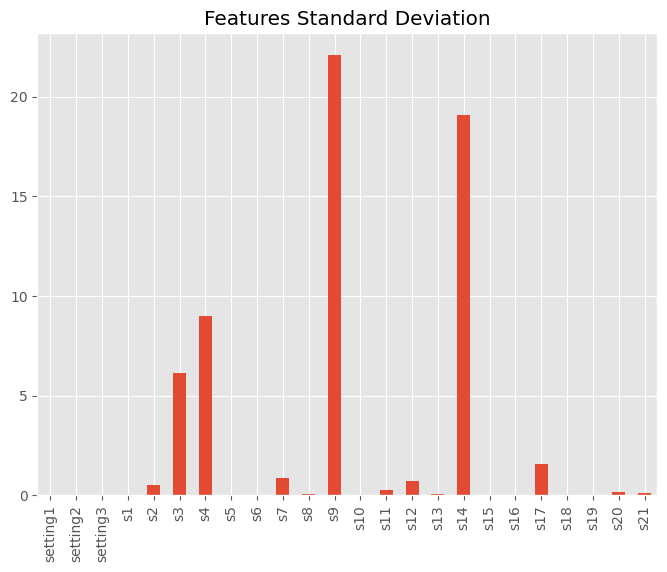

In [88]:
df_tr_lbl[featurs].std().plot(kind='bar', figsize=(8,6), title="Features Standard Deviation")


<Axes: title={'center': 'Features Standard Deviation (log)'}>

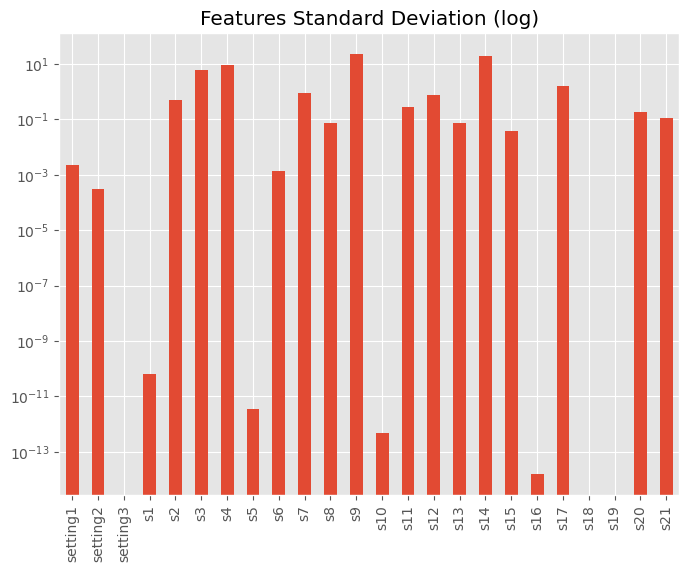

In [89]:
# plot and compare the log standard deviation of input features:

df_tr_lbl[featurs].std().plot(kind='bar', figsize=(8,6), logy=True,title="Features Standard Deviation (log)")


In [90]:
# get ordered list of top variance features:

featurs_top_var = df_tr_lbl[featurs].std().sort_values(ascending=False)
featurs_top_var

s9          2.208288e+01
s14         1.907618e+01
s4          9.000605e+00
s3          6.131150e+00
s17         1.548763e+00
s7          8.850923e-01
s12         7.375534e-01
s2          5.000533e-01
s11         2.670874e-01
s20         1.807464e-01
s21         1.082509e-01
s13         7.191892e-02
s8          7.098548e-02
s15         3.750504e-02
setting1    2.187313e-03
s6          1.388985e-03
setting2    2.930621e-04
s1          6.537152e-11
s5          3.394700e-12
s10         4.660829e-13
s16         1.556432e-14
s18         0.000000e+00
s19         0.000000e+00
setting3    0.000000e+00
dtype: float64

In [91]:
# get ordered list features correlation with regression label ttf

df_tr_lbl[featurs].corrwith(df_tr_lbl.ttf).sort_values(ascending=False)

s12         6.719831e-01
s7          6.572227e-01
s21         6.356620e-01
s20         6.294285e-01
s16        -6.041754e-16
s5         -6.041754e-16
setting2   -1.947628e-03
setting1   -3.198458e-03
s6         -1.283484e-01
s14        -3.067689e-01
s9         -3.901016e-01
s13        -5.625688e-01
s8         -5.639684e-01
s3         -5.845204e-01
s17        -6.061536e-01
s2         -6.064840e-01
s15        -6.426670e-01
s4         -6.789482e-01
s11        -6.962281e-01
setting3             NaN
s1                   NaN
s10                  NaN
s18                  NaN
s19                  NaN
dtype: float64

In [92]:
# list of features having low or no correlation with regression label ttf and very low or no variance
# These features will be target for removal in feature selection

low_cor_featrs = ['setting3', 's1', 's10', 's18','s19','s16','s5', 'setting2', 'setting1']
df_tr_lbl[low_cor_featrs].describe()

,setting3,s1,s10,s18,s19,s16,s5,setting2,setting1
count,20631.0,2.063100e+04,2.063100e+04,20631.0,20631.0,2.063100e+04,2.063100e+04,20631.000000,20631.000000
mean,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,0.000002,-0.000009
std,0.0,6.537152e-11,4.660829e-13,0.0,0.0,1.556432e-14,3.394700e-12,0.000293,0.002187
min,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,-0.000600,-0.008700
25%,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,-0.000200,-0.001500
50%,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,0.000000,0.000000
75%,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,0.000300,0.001500
max,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,0.000600,0.008700


In [93]:
# list of features having high correlation with regression label ttf

correl_featurs = ['s12', 's7', 's21', 's20', 's6', 's14', 's9', 's13', 's8', 's3', 's17', 's2', 's15', 's4', 's11']

df_tr_lbl[correl_featurs].describe()

,s12,s7,s21,s20,s6,s14,s9,s13,s8,s3,s17,s2,s15,s4,s11
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,521.413470,553.367711,23.289705,38.816271,21.609803,8143.752722,9065.242941,2388.096152,2388.096652,1590.523119,393.210654,642.680934,8.442146,1408.933782,47.541168
std,0.737553,0.885092,0.108251,0.180746,0.001389,19.076176,22.082880,0.071919,0.070985,6.131150,1.548763,0.500053,0.037505,9.000605,0.267087
min,518.690000,549.850000,22.894200,38.140000,21.600000,8099.940000,9021.730000,2387.880000,2387.900000,1571.040000,388.000000,641.210000,8.324900,1382.250000,46.850000
25%,520.960000,552.810000,23.221800,38.700000,21.610000,8133.245000,9053.100000,2388.040000,2388.050000,1586.260000,392.000000,642.325000,8.414900,1402.360000,47.350000
50%,521.480000,553.440000,23.297900,38.830000,21.610000,8140.540000,9060.660000,2388.090000,2388.090000,1590.100000,393.000000,642.640000,8.438900,1408.040000,47.510000
75%,521.950000,554.010000,23.366800,38.950000,21.610000,8148.310000,9069.420000,2388.140000,2388.140000,1594.380000,394.000000,643.000000,8.465600,1414.555000,47.700000
max,523.380000,556.060000,23.618400,39.430000,21.610000,8293.720000,9244.590000,2388.560000,2388.560000,1616.910000,400.000000,644.530000,8.584800,1441.490000,48.530000


['s12', 's7', 's21', 's20', 's6', 's14', 's9', 's13', 's8', 's3', 's17', 's2', 's15', 's4', 's11'] could be target for feature selection during modeling since their correlation with TTF is higher than other features.

Let us disply this correlation in heatmap

In [95]:
# add the regression label 'ttf' to the list of high corr features 

correl_featurs_lbl = correl_featurs + ['ttf']

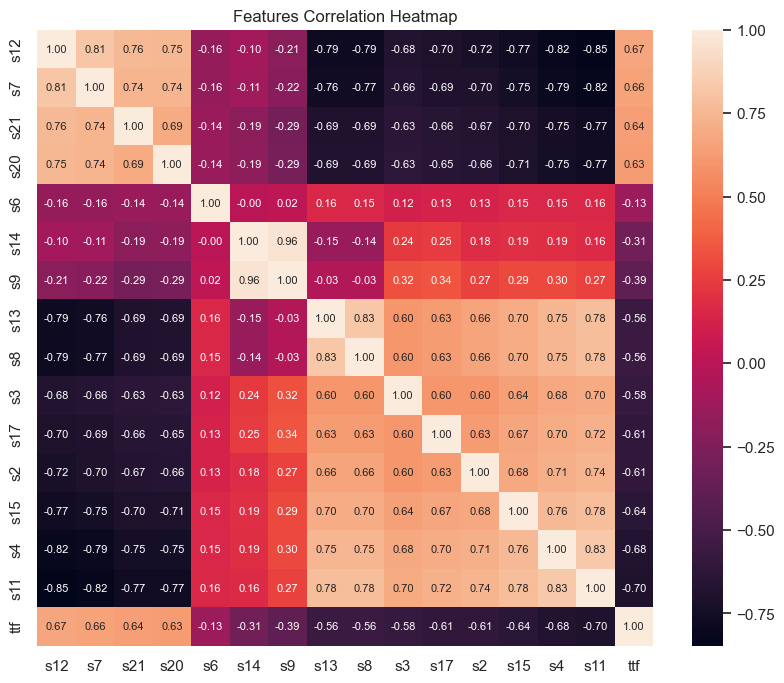

In [96]:
# plot a heatmap to display +ve and -ve correlation among features and regression label:

import seaborn as sns
cm = np.corrcoef(df_tr_lbl[correl_featurs_lbl].values.T)
sns.set(font_scale=1.0)
fig = plt.figure(figsize=(10, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=correl_featurs_lbl, xticklabels=correl_featurs_lbl)
plt.title('Features Correlation Heatmap')
plt.show()

There is a very high correlation (> 0.8) between some features: (s14, s9), (s11, s4), (s11, s7), (s11, s12), (s4, s12), (s8,s13), (s7, s12)
This may hurt the performance of some ML algorithms.

So, some of the above features will be target for removal in feature selection

Most of the features have normal distribution which has positve effect on machine learning algorithms.

Most of the features have non-linear relationship with the regression label ttf, so using polynomial models may lead to better results.

In [97]:
def explore_col(s, e):
    
    """Plot 4 main graphs for a single feature.
    
        plot1: histogram 
        plot2: boxplot 
        plot3: line plot (time series over cycle)
        plot4: scatter plot vs. regression label ttf
        
    Args:
        s (str): The column name of the feature to be plotted.
        e (int): The number of random engines to be plotted for plot 3. Range from 1 -100, 0:all engines, >100: all engines.

    Returns:
        plots
    
    """
    
    fig = plt.figure(figsize=(10, 8))


    sub1 = fig.add_subplot(221) 
    sub1.set_title(s +' histogram') 
    sub1.hist(df_tr_lbl[s])

    sub2 = fig.add_subplot(222)
    sub2.set_title(s +' boxplot')
    sub2.boxplot(df_tr_lbl[s])
    
    #np.random.seed(12345)
    
    if e > 100 or e <= 0:
        select_engines = list(pd.unique(df_tr_lbl.id))
    else:
        select_engines = np.random.choice(range(1,101), e, replace=False)
        
    sub3 = fig.add_subplot(223)
    sub3.set_title('time series: ' + s +' / cycle')
    sub3.set_xlabel('cycle')
    for i in select_engines:
        df = df_tr_lbl[['cycle', s]][df_tr_lbl.id == i]
        sub3.plot(df['cycle'],df[s])
    
    sub4 = fig.add_subplot(224)
    sub4.set_title("scatter: "+ s + " / ttf (regr label)")
    sub4.set_xlabel('ttf')
    sub4.scatter(df_tr_lbl['ttf'],df_tr_lbl[s])


    plt.tight_layout()
    plt.show()

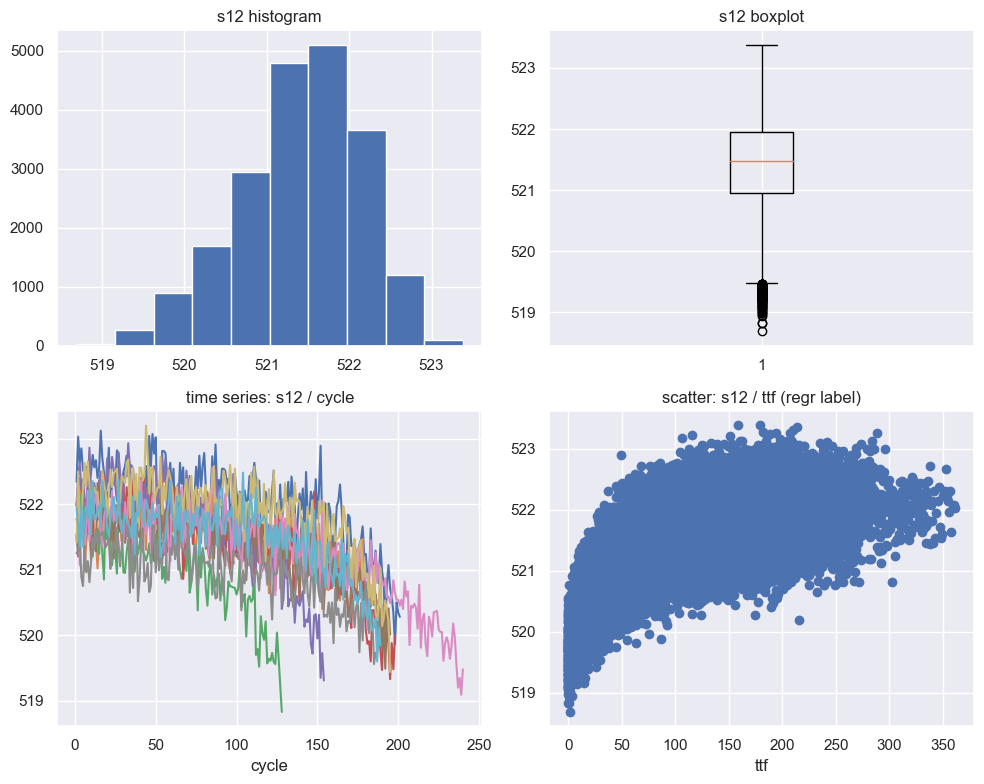

In [98]:
explore_col("s12", 10)


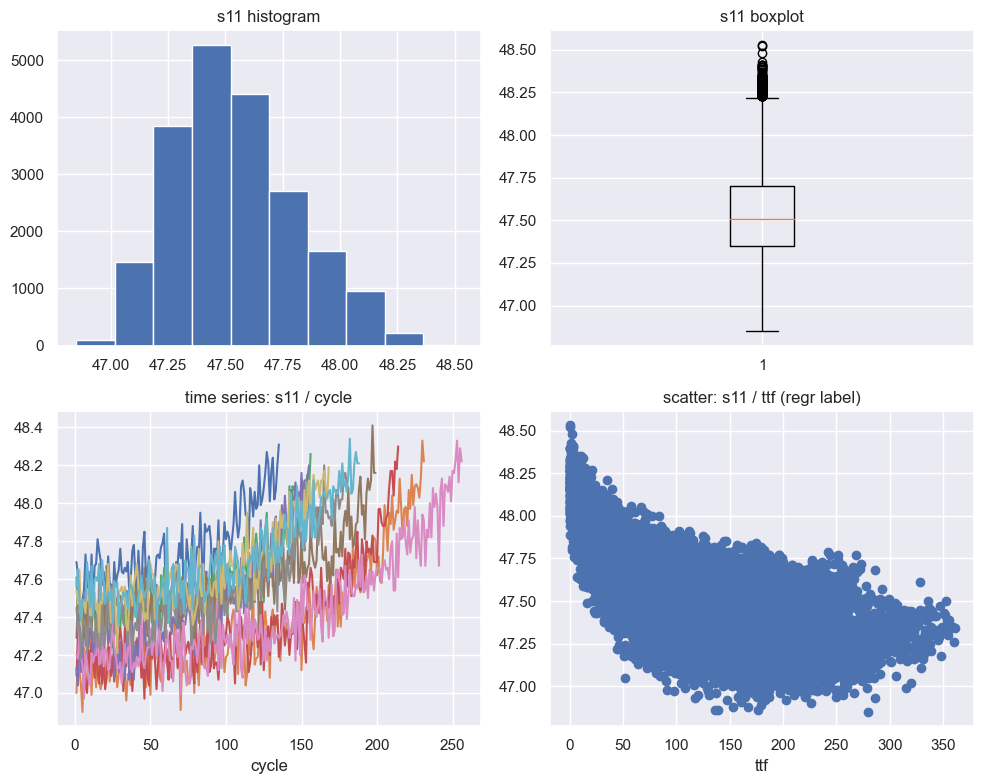

In [99]:
explore_col("s11", 10)


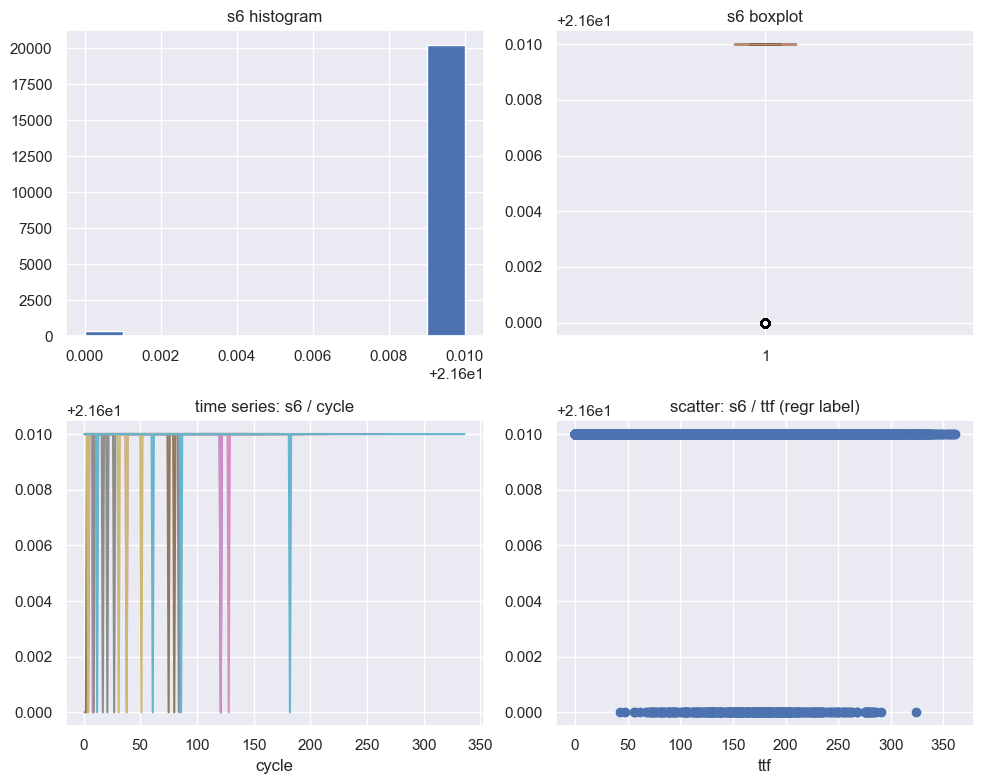

In [100]:
explore_col("s6", 10)


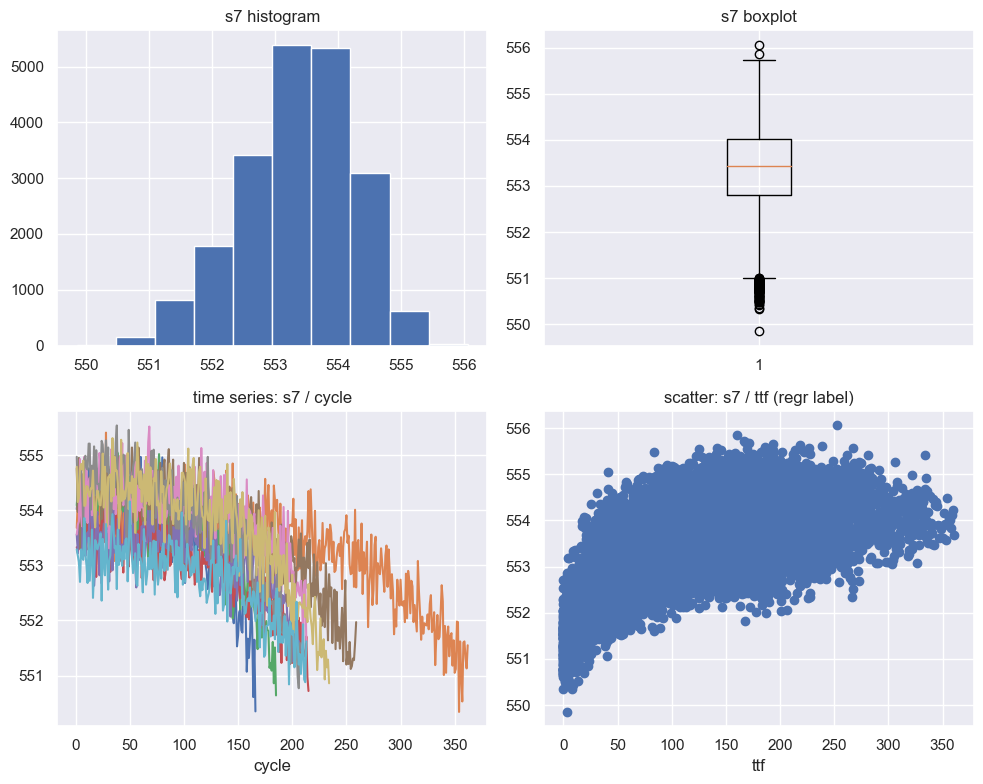

In [101]:
explore_col("s7", 10)


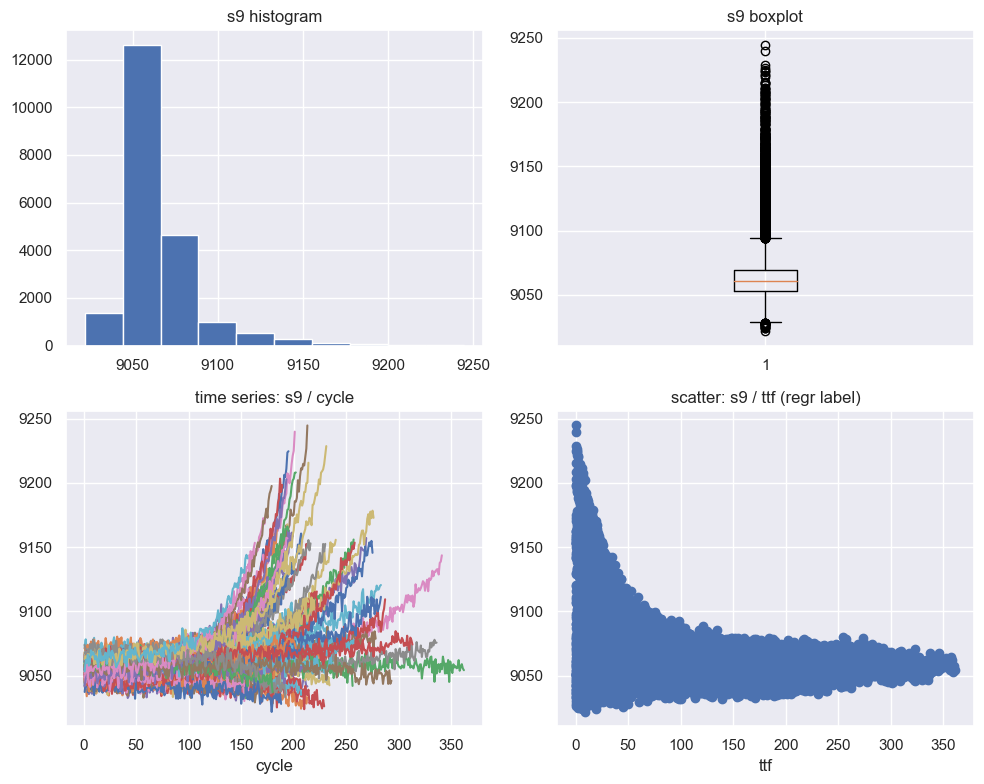

In [102]:
explore_col("s9", 100)


In [103]:
# Create a function to explore the time series plot each sensor selecting random sample engines

def plot_time_series(s):
    
    """Plot time series of a single sensor for 10 random sample engines.
    
        Args:
        s (str): The column name of the sensor to be plotted.

    Returns:
        plots
        
    """
    
    fig, axes = plt.subplots(10, 1, sharex=True, figsize = (15, 15))
    fig.suptitle(s + ' time series / cycle', fontsize=15)
    
    #np.random.seed(12345)
    select_engines = np.random.choice(range(1,101), 10, replace=False).tolist()
    
    for e_id in select_engines:
        df = df_tr_lbl[['cycle', s]][df_tr_lbl.id == e_id]
        i = select_engines.index(e_id)
        axes[i].plot(df['cycle'],df[s])
        axes[i].set_ylabel('engine ' + str(e_id))
        axes[i].set_xlabel('cycle')
        #axes[i].set_title('engine ' + str(e_id), loc='right')

    #plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()


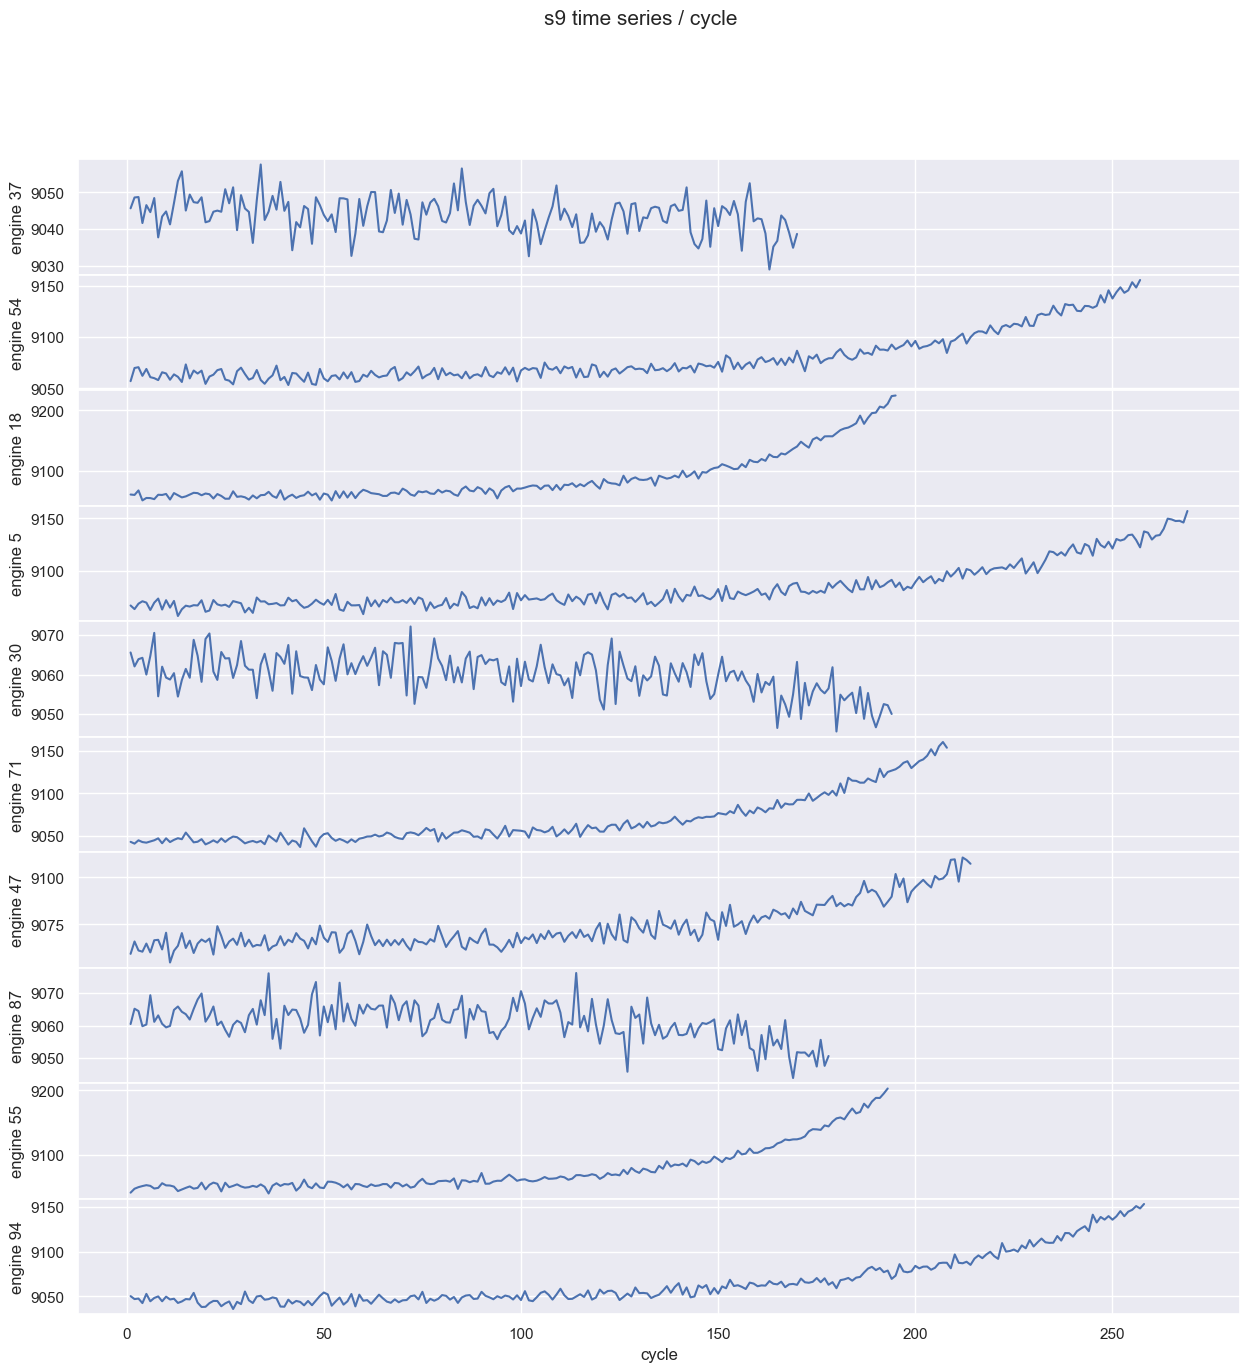

In [104]:
plot_time_series('s9')

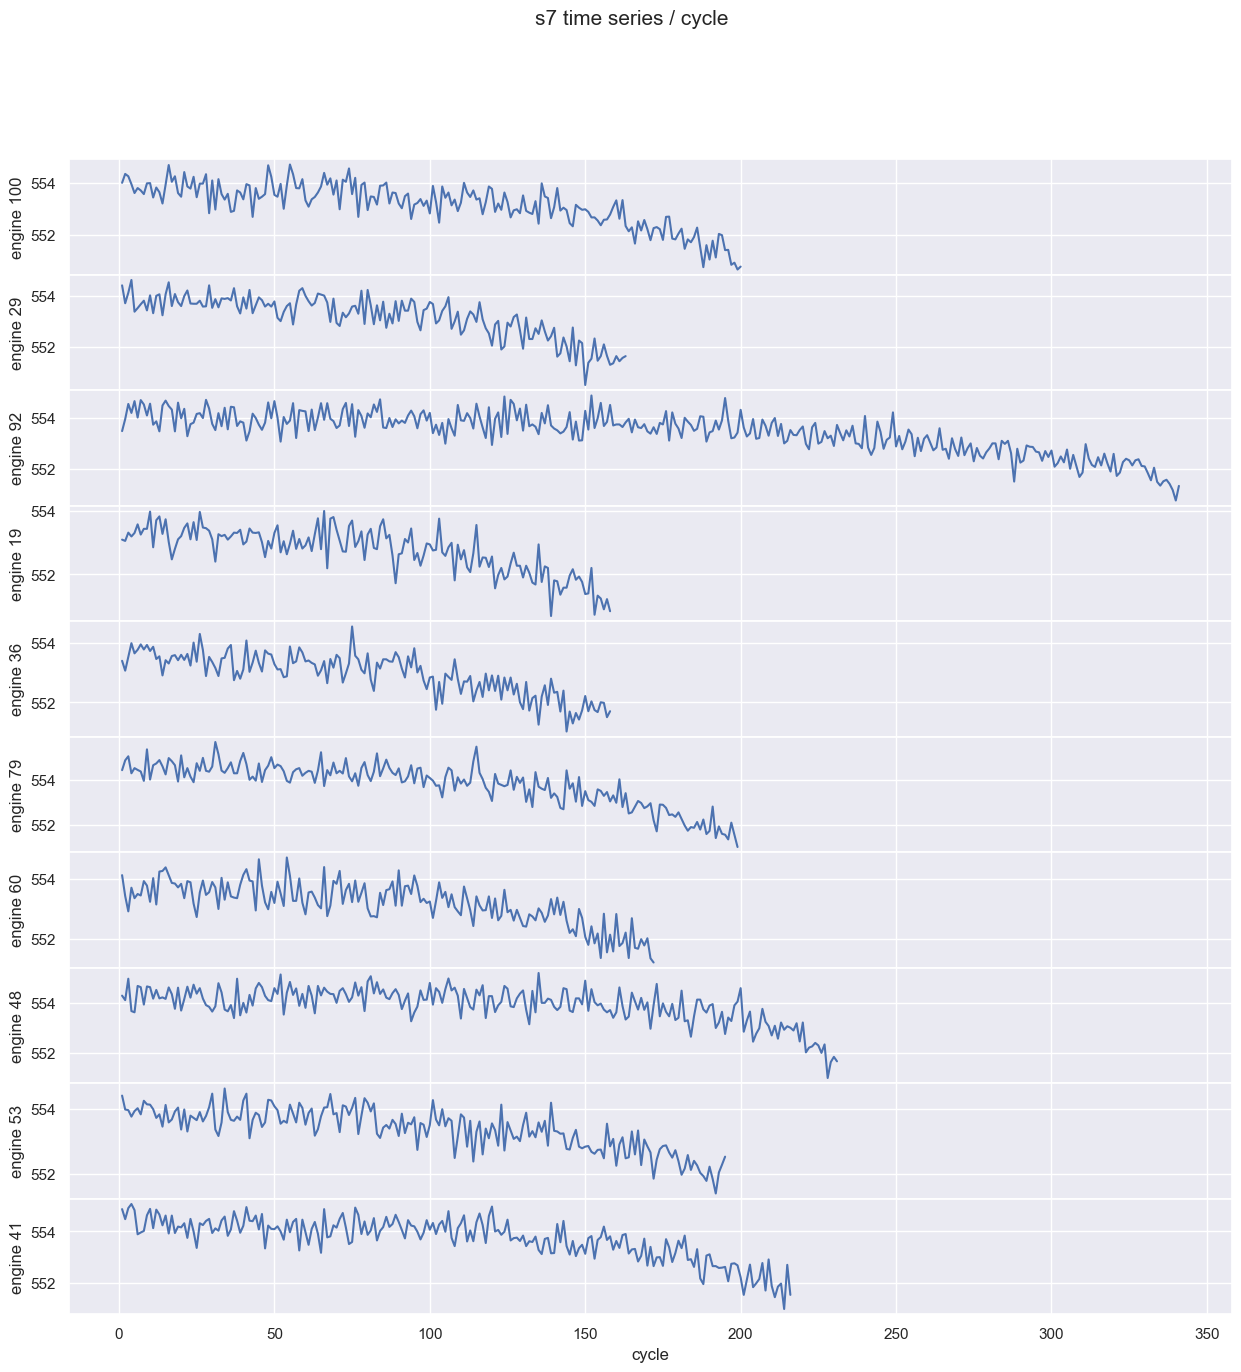

In [105]:
plot_time_series('s7')


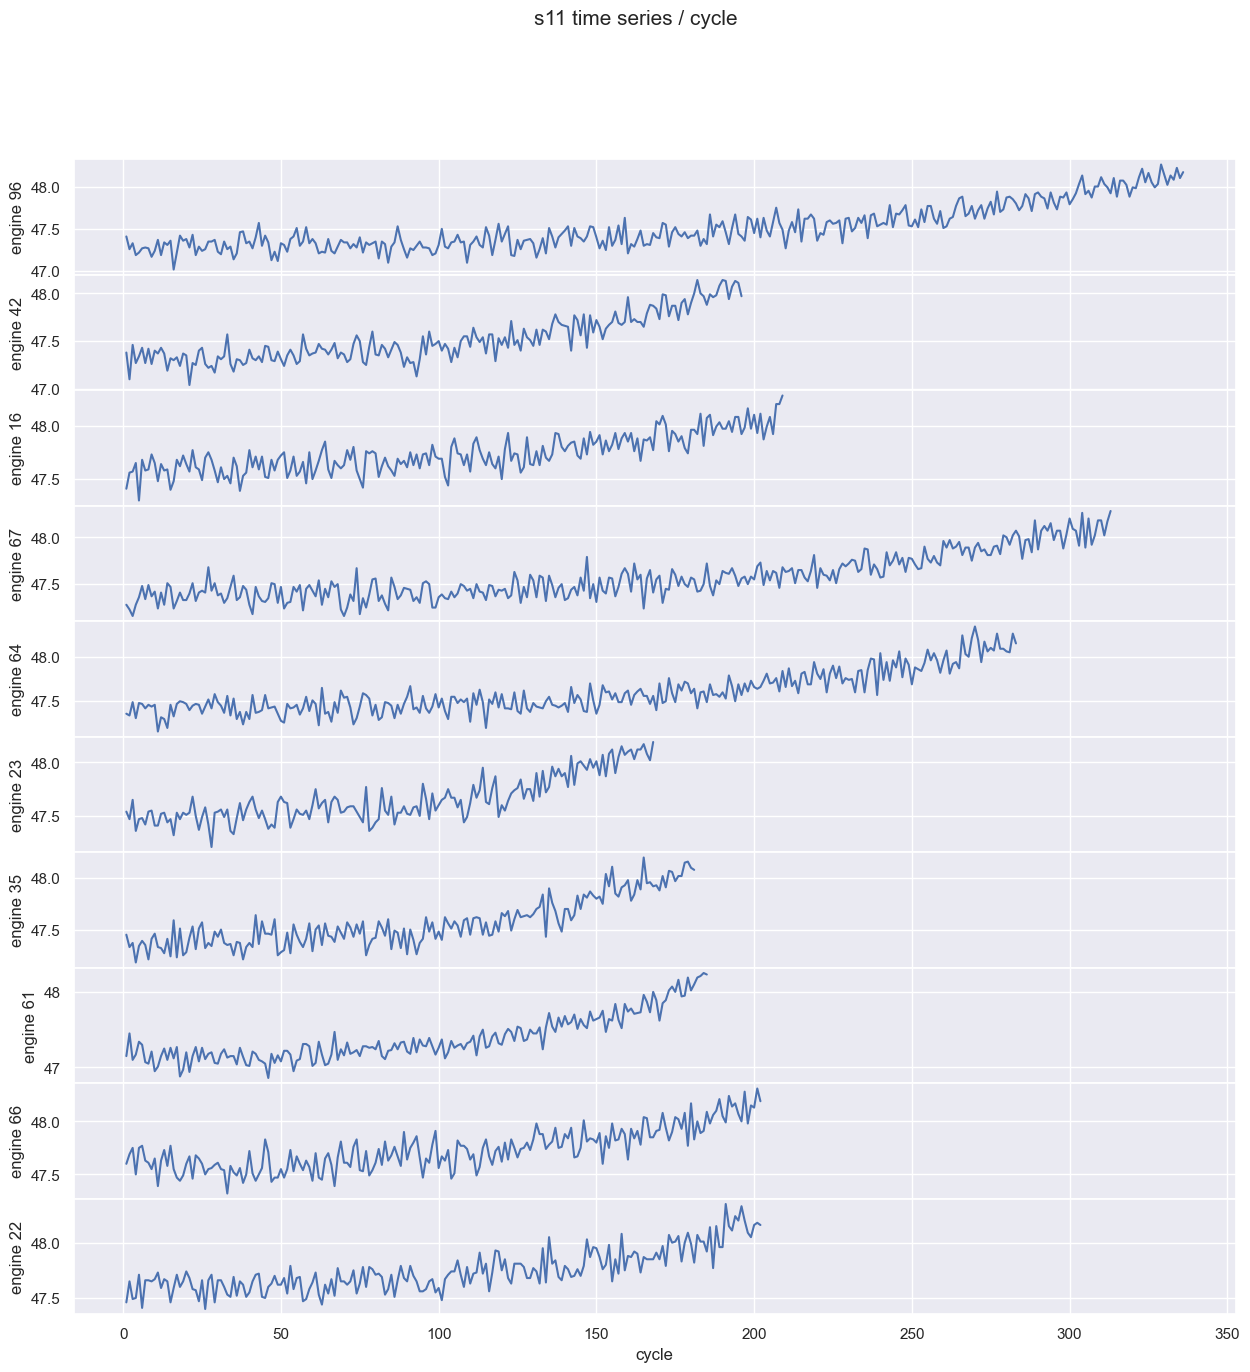

In [106]:
plot_time_series('s11')


In [107]:
# print stat for binary classification label

print(df_tr_lbl['label_bnc'].value_counts())
print('\nNegaitve samples =  {0:.0%}'.format(df_tr_lbl['label_bnc'].value_counts()[0]/df_tr_lbl['label_bnc'].count()))
print('\nPosiitve samples =  {0:.0%}'.format(df_tr_lbl['label_bnc'].value_counts()[1]/df_tr_lbl['label_bnc'].count()))


0    17531
1     3100
Name: label_bnc, dtype: int64

Negaitve samples =  85%

Posiitve samples =  15%


This is clearly unbalanced dataset, so we should not depend on classification Accuracy as a model performance metric. We can use AUC ROC instead.

In [108]:
# print stat for multiclass classification label

print(df_tr_lbl['label_mcc'].value_counts())
print('\nClass 0 samples =  {0:.0%}'.format(df_tr_lbl['label_mcc'].value_counts()[0]/df_tr_lbl['label_mcc'].count()))
print('\nClass 1 samples =  {0:.0%}'.format(df_tr_lbl['label_mcc'].value_counts()[1]/df_tr_lbl['label_mcc'].count()))
print('\nClass 2 samples =  {0:.0%}'.format(df_tr_lbl['label_mcc'].value_counts()[2]/df_tr_lbl['label_mcc'].count()))

0    17531
2     1600
1     1500
Name: label_mcc, dtype: int64

Class 0 samples =  85%

Class 1 samples =  7%

Class 2 samples =  8%


EDA Summary:

There is a very high correlation (> 0.8) between some features e.g.(s14 & s9), (s11 & s4), (s11 & s7), (s11 & s12), (s4 & s12), (s8 & s13), (s7 & s12). This multicollinearity may hurt the performance of some machine learning algorithms. So, part of these features will be target for elimination in feature selection during the modeling phase.

Most features have nonlinear relation with the TTF, hence adding their polynomial transforms may enhance models performance.

Most features exhibit normal distribution which is likely improves models performance.

AUC ROC should be used for classification models evaluation instead of Accuracy due to class’s imbalance in the training data.

In [111]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  

from sklearn import metrics

from sklearn import model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [112]:
import pandas as pd

# Correct file path
file_path = 'C:\\Users\\anush\\Downloads\\train.csv'
df_train = pd.read_csv(file_path)

# Display the first five rows
df_train.head()


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573,189,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977,188,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498,187,0,0


In [113]:
import pandas as pd

# Correct file path
file_path = 'C:\\Users\\anush\\Downloads\\test.csv'
df_test = pd.read_csv(file_path)

# Display the first five rows
df_test.head()


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,0.021174,0.0,0.707107,0.0,0.0,0.124016,0.025037,112,0,0
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,0.011429,0.0,1.095445,0.0,0.0,0.069785,0.027820,98,0,0
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,0.030924,0.0,0.836660,0.0,0.0,0.143631,0.018966,69,0,0
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,0.021249,0.0,1.341641,0.0,0.0,0.126372,0.021106,82,0,0
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,0.009627,0.0,0.547723,0.0,0.0,0.091924,0.101100,91,0,0


Create training and test data labels series.

Create features sets required to subset the original dataframes into original features and original + extracted features

In [114]:
# original features
features_orig = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

# original + extracted fetures
features_extr = ['setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 'av1', 'av2', 'av3', 'av4', 'av5', 'av6', 'av7', 'av8', 'av9', 'av10', 'av11', 'av12', 'av13', 'av14', 'av15', 'av16', 'av17', 'av18', 'av19', 'av20', 'av21', 'sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6', 'sd7', 'sd8', 'sd9', 'sd10', 'sd11', 'sd12', 'sd13', 'sd14', 'sd15', 'sd16', 'sd17', 'sd18', 'sd19', 'sd20', 'sd21']

y_train = df_train['label_bnc']
y_test = df_test['label_bnc']

Binary Classifcation:
Let us add some helper fuctions

In [115]:
def bin_classify(model, clf, features, params=None, score=None):
    
    """Perfor Grid Search hyper parameter tuning on a classifier.
    
    Args:
        model (str): The model name identifier
        clf (clssifier object): The classifier to be tuned
        features (list): The set of input features names
        params (dict): Grid Search parameters
        score (str): Grid Search score
        
    Returns:
        Tuned Clssifier object
        dataframe of model predictions and scores
    
    """
    
    
    X_train = df_train[features]

    X_test = df_test[features] 
    
    grid_search = model_selection.GridSearchCV(estimator=clf, param_grid=params, cv=5, scoring=score, n_jobs=-1)

    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    
    if hasattr(grid_search, 'predict_proba'):   
        y_score = grid_search.predict_proba(X_test)[:,1]
    elif hasattr(grid_search, 'decision_function'):
        y_score = grid_search.decision_function(X_test)
    else:
        y_score = y_pred
        
    predictions = {'y_pred' : y_pred, 'y_score' : y_score}
    df_predictions = pd.DataFrame.from_dict(predictions)
    
    return grid_search.best_estimator_, df_predictions

In [116]:
def bin_class_metrics(model, y_test, y_pred, y_score, print_out=True, plot_out=True):
    
    """Calculate main binary classifcation metrics, plot AUC ROC and Precision-Recall curves.
    
    Args:
        model (str): The model name identifier
        y_test (series): Contains the test label values
        y_pred (series): Contains the predicted values
        y_score (series): Contains the predicted scores
        print_out (bool): Print the classification metrics and thresholds values
        plot_out (bool): Plot AUC ROC, Precision-Recall, and Threshold curves
        
    Returns:
        dataframe: The combined metrics in single dataframe
        dataframe: ROC thresholds
        dataframe: Precision-Recall thresholds
        Plot: AUC ROC
        plot: Precision-Recall
        plot: Precision-Recall threshold; also show the number of engines predicted for maintenace per period (queue).
        plot: TPR-FPR threshold
        
    """
      
    binclass_metrics = {
                        'Accuracy' : metrics.accuracy_score(y_test, y_pred),
                        'Precision' : metrics.precision_score(y_test, y_pred),
                        'Recall' : metrics.recall_score(y_test, y_pred),
                        'F1 Score' : metrics.f1_score(y_test, y_pred),
                        'ROC AUC' : metrics.roc_auc_score(y_test, y_score)
                       }

    df_metrics = pd.DataFrame.from_dict(binclass_metrics, orient='index')
    df_metrics.columns = [model]  


    fpr, tpr, thresh_roc = metrics.roc_curve(y_test, y_score)
    
    roc_auc = metrics.auc(fpr, tpr)

    engines_roc = []  
    for thr in thresh_roc:  
        engines_roc.append((y_score >= thr).mean())

    engines_roc = np.array(engines_roc)

    roc_thresh = {
                    'Threshold' : thresh_roc,
                    'TPR' : tpr,
                    'FPR' : fpr,
                    'Que' : engines_roc
                 }
    
    df_roc_thresh = pd.DataFrame.from_dict(roc_thresh)
    
    #calculate other classification metrics: TP, FP, TN, FN, TNR, FNR
    #from ground truth file, positive class = 25 => TP + FN = 25
    #from ground truth file, negative class = 75 => TN + FP = 75
    
    df_roc_thresh['TP'] = (25*df_roc_thresh.TPR).astype(int)
    df_roc_thresh['FP'] = (25 - (25*df_roc_thresh.TPR)).astype(int)
    df_roc_thresh['TN'] = (75*(1 - df_roc_thresh.FPR)).astype(int)
    df_roc_thresh['FN'] = (75 - (75*(1 - df_roc_thresh.FPR))).astype(int)
    
    df_roc_thresh['TNR'] = df_roc_thresh['TN']/(df_roc_thresh['TN'] + df_roc_thresh['FN'])
    df_roc_thresh['FNR'] = df_roc_thresh['TN']/(df_roc_thresh['TN'] + df_roc_thresh['FP'])
    
    df_roc_thresh['Model'] = model

    

    precision, recall, thresh_prc = metrics.precision_recall_curve(y_test, y_score)

    thresh_prc = np.append(thresh_prc,1)

    engines_prc = []  
    for thr in thresh_prc:  
        engines_prc.append((y_score >= thr).mean())

    engines_prc = np.array(engines_prc)

    prc_thresh = {
                    'Threshold' : thresh_prc,
                    'Precision' : precision,
                    'Recall' : recall,
                    'Que' : engines_prc
                 }

    df_prc_thresh = pd.DataFrame.from_dict(prc_thresh)

    if print_out:
        print('-----------------------------------------------------------')
        print(model, '\n')
        print('Confusion Matrix:')
        print(metrics.confusion_matrix(y_test, y_pred))
        print('\nClassification Report:')
        print(metrics.classification_report(y_test, y_pred))
        print('\nMetrics:')
        print(df_metrics)

        print('\nROC Thresholds:\n')
        print(df_roc_thresh[['Threshold', 'TP', 'FP', 'TN', 'FN', 'TPR', 'FPR', 'TNR','FNR', 'Que']])

        print('\nPrecision-Recall Thresholds:\n')
        print(df_prc_thresh[['Threshold', 'Precision', 'Recall', 'Que']])

    if plot_out:
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False )
        fig.set_size_inches(10,10)

        ax1.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f'% roc_auc)
        ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax1.set_xlim([-0.05, 1.0])
        ax1.set_ylim([0.0, 1.05])
        ax1.set_xlabel('False Positive Rate')
        ax1.set_ylabel('True Positive Rate')
        ax1.legend(loc="lower right", fontsize='small')

        ax2.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
        ax2.set_xlim([0.0, 1.0])
        ax2.set_ylim([0.0, 1.05])
        ax2.set_xlabel('Recall')
        ax2.set_ylabel('Precision')
        ax2.legend(loc="lower left", fontsize='small')

        ax3.plot(thresh_roc, fpr, color='red', lw=2, label='FPR')  
        ax3.plot(thresh_roc, tpr, color='green',label='TPR') 
        ax3.plot(thresh_roc, engines_roc, color='blue',label='Engines') 
        ax3.set_ylim([0.0, 1.05])
        ax3.set_xlabel('Threshold')  
        ax3.set_ylabel('%')
        ax3.legend(loc='upper right', fontsize='small')

        ax4.plot(thresh_prc, precision, color='red', lw=2, label='Precision')  
        ax4.plot(thresh_prc, recall, color='green',label='Recall') 
        ax4.plot(thresh_prc, engines_prc, color='blue',label='Engines') 
        ax4.set_ylim([0.0, 1.05])
        ax4.set_xlabel('Threshold')  
        ax4.set_ylabel('%')
        ax4.legend(loc='lower left', fontsize='small')

    return  df_metrics, df_roc_thresh, df_prc_thresh

Using the above functions let us model and evaluate some binary classification algorithms

In model names:

B stands for applying the model on the original features set, __B__efore feature extraction
A stands for applying the model on the original + extracted features set, __A__fter feature extraction

C:\Users\anush\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Best Parameters:
 LogisticRegression(C=10, random_state=123)
-----------------------------------------------------------
Logistic Regression B 

Confusion Matrix:
[[75  0]
 [ 9 16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        75
           1       1.00      0.64      0.78        25

    accuracy                           0.91       100
   macro avg       0.95      0.82      0.86       100
weighted avg       0.92      0.91      0.90       100


Metrics:
           Logistic Regression B
Accuracy                0.910000
Precision               1.000000
Recall                  0.640000
F1 Score                0.780488
ROC AUC                 0.979733

ROC Thresholds:

      Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0           inf   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1  9.945819e-01   1  24  75   0  0.04  0.000000  1.000000  0.757576  0.01
2  5.881404e-01  1

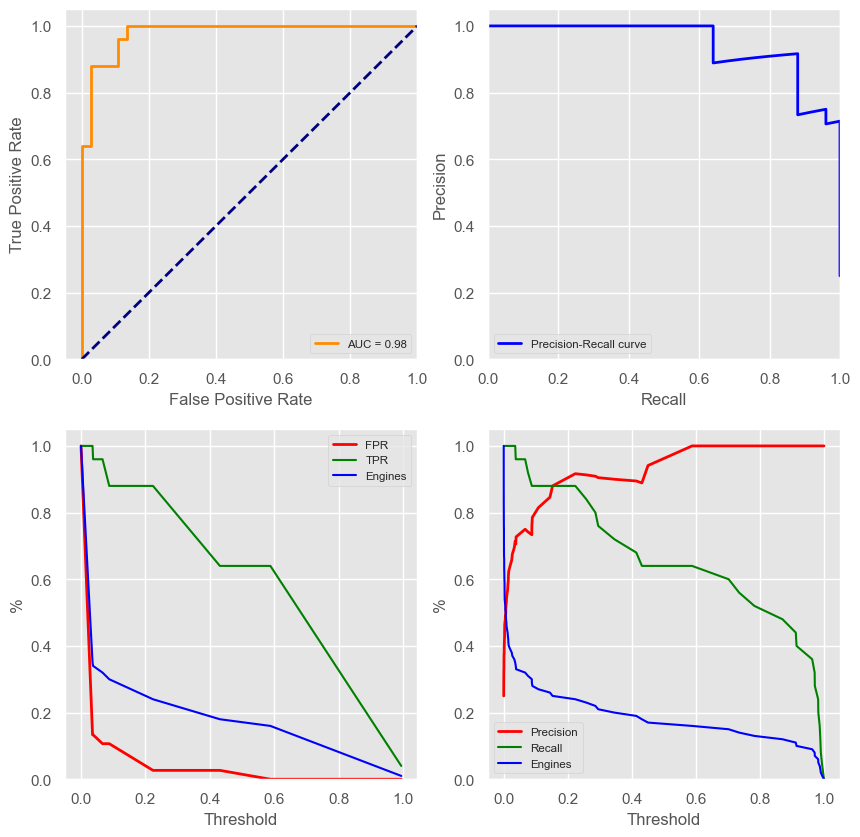

In [117]:
model = 'Logistic Regression B'
clf_lgrb = LogisticRegression(random_state=123)
gs_params = {'C': [.01, 0.1, 1.0, 10], 'solver': ['liblinear', 'lbfgs']}
gs_score = 'roc_auc'

clf_lgrb, pred_lgrb = bin_classify(model, clf_lgrb, features_orig, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_lgrb)

metrics_lgrb, roc_lgrb, prc_lgrb = bin_class_metrics(model, y_test, pred_lgrb.y_pred, pred_lgrb.y_score, print_out=True, plot_out=True)

C:\Users\anush\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Best Parameters:
 LogisticRegression(C=10, random_state=123)
-----------------------------------------------------------
Logistic Regression A 

Confusion Matrix:
[[75  0]
 [ 8 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        75
           1       1.00      0.68      0.81        25

    accuracy                           0.92       100
   macro avg       0.95      0.84      0.88       100
weighted avg       0.93      0.92      0.91       100


Metrics:
           Logistic Regression A
Accuracy                0.920000
Precision               1.000000
Recall                  0.680000
F1 Score                0.809524
ROC AUC                 0.981867

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0         inf   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1    0.994072   1  24  75   0  0.04  0.000000  1.000000  0.757576  0.01
2    0.619065  17   8  7

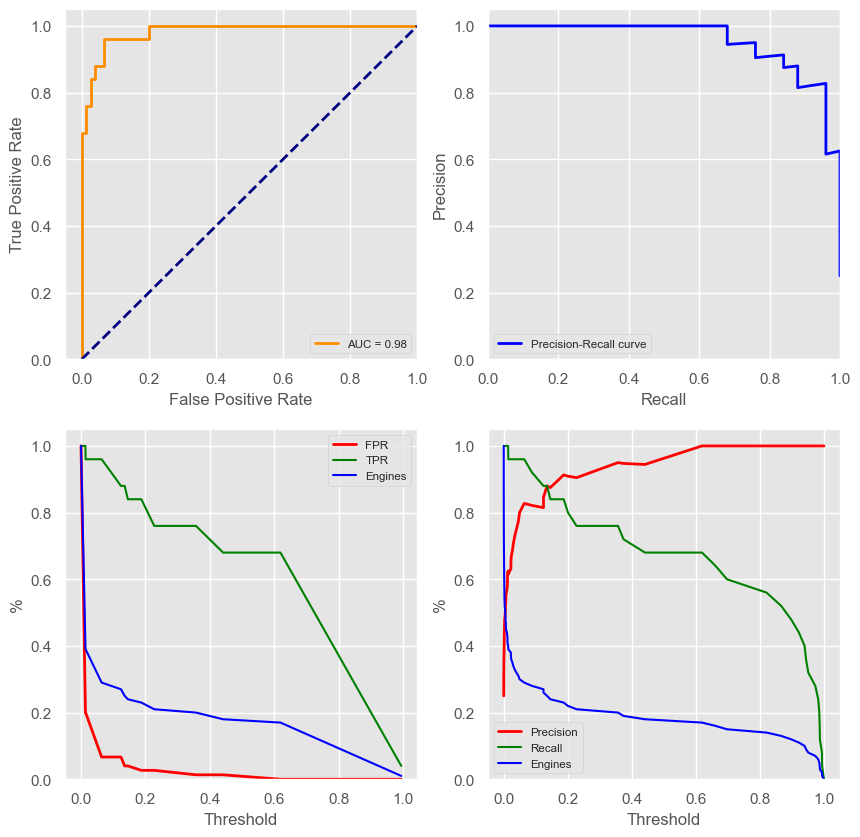

In [118]:
model = 'Logistic Regression A'
clf_lgra = LogisticRegression(random_state=123)
gs_params = {'C': [.01, 0.1, 1.0, 10], 'solver': ['liblinear', 'lbfgs']}
gs_score = 'roc_auc'

clf_lgra, pred_lgra = bin_classify(model, clf_lgra, features_extr, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_lgra)

metrics_lgra, roc_lgra, prc_lgra = bin_class_metrics(model, y_test, pred_lgra.y_pred, pred_lgra.y_score, print_out=True, plot_out=True)

In [119]:
metrics_lgr = pd.concat([metrics_lgrb, metrics_lgra], axis=1)
metrics_lgr

,Logistic Regression B,Logistic Regression A
Accuracy,0.910000,0.920000
Precision,1.000000,1.000000
Recall,0.640000,0.680000
F1 Score,0.780488,0.809524
ROC AUC,0.979733,0.981867



Best Parameters:
 DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=123)
-----------------------------------------------------------
Decision Tree B 

Confusion Matrix:
[[74  1]
 [11 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93        75
           1       0.93      0.56      0.70        25

    accuracy                           0.88       100
   macro avg       0.90      0.77      0.81       100
weighted avg       0.89      0.88      0.87       100


Metrics:
           Decision Tree B
Accuracy          0.880000
Precision         0.933333
Recall            0.560000
F1 Score          0.700000
ROC AUC           0.945067

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0         inf   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1    1.000000   7  18  75   0  0.28  0.000000  1.000000  0.806452  0.07
2    0.938119   9  16  75   0  0.3

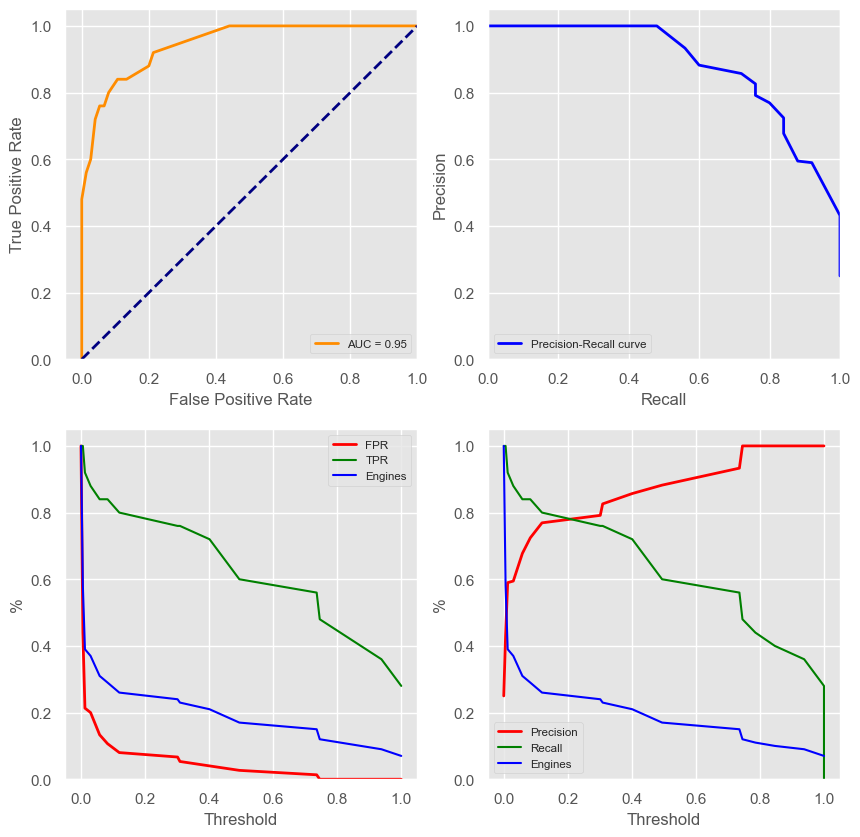

In [120]:
model = 'Decision Tree B'
clf_dtrb = DecisionTreeClassifier(random_state=123)
gs_params = {'max_depth': [2, 3, 4, 5, 6], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_dtrb, pred_dtrb = bin_classify(model, clf_dtrb, features_orig, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_dtrb)

metrics_dtrb, roc_dtrb, prc_dtrb = bin_class_metrics(model, y_test, pred_dtrb.y_pred, pred_dtrb.y_score, print_out=True, plot_out=True)


Best Parameters:
 DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=123)
-----------------------------------------------------------
Decision Tree A 

Confusion Matrix:
[[74  1]
 [ 7 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        75
           1       0.95      0.72      0.82        25

    accuracy                           0.92       100
   macro avg       0.93      0.85      0.88       100
weighted avg       0.92      0.92      0.92       100


Metrics:
           Decision Tree A
Accuracy          0.920000
Precision         0.947368
Recall            0.720000
F1 Score          0.818182
ROC AUC           0.962933

ROC Thresholds:

   Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0        inf   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1   1.000000  10  15  75   0  0.40  0.000000  1.000000  0.833333  0.10
2   0.921053  11  14  75   0  0.44  0

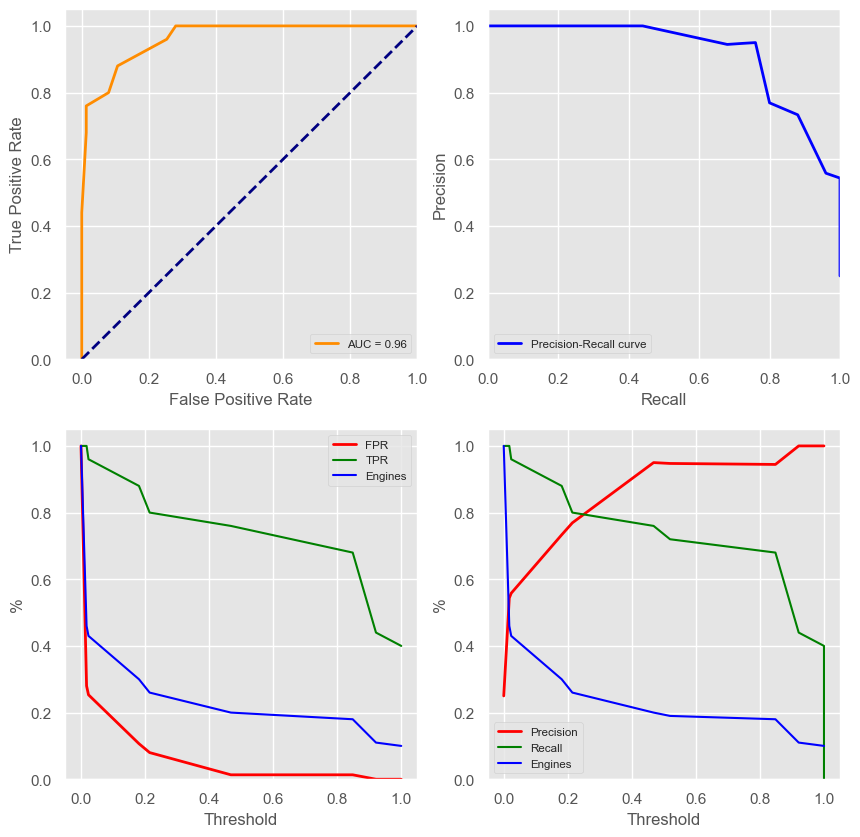

In [121]:
model = 'Decision Tree A'
clf_dtra = DecisionTreeClassifier(random_state=123)
gs_params = {'max_depth': [3, 4, 5, 6, 7], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_dtra, pred_dtra = bin_classify(model, clf_dtra, features_extr, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_dtra)

metrics_dtra, roc_dtra, prc_dtra = bin_class_metrics(model, y_test, pred_dtra.y_pred, pred_dtra.y_score, print_out=True, plot_out=True)

In [122]:
metrics_dtr = pd.concat([metrics_dtrb, metrics_dtra], axis=1)
metrics_dtr

,Decision Tree B,Decision Tree A
Accuracy,0.880000,0.920000
Precision,0.933333,0.947368
Recall,0.560000,0.720000
F1 Score,0.700000,0.818182
ROC AUC,0.945067,0.962933



Best Parameters:
 RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=50,
                       random_state=123)
-----------------------------------------------------------
Random Forest B 

Confusion Matrix:
[[74  1]
 [ 8 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        75
           1       0.94      0.68      0.79        25

    accuracy                           0.91       100
   macro avg       0.92      0.83      0.87       100
weighted avg       0.91      0.91      0.90       100


Metrics:
           Random Forest B
Accuracy          0.910000
Precision         0.944444
Recall            0.680000
F1 Score          0.790698
ROC AUC           0.980267

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0         inf   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1    0.997997   1  24  75   0  0.04  0.000000  1.000000  0.757576 

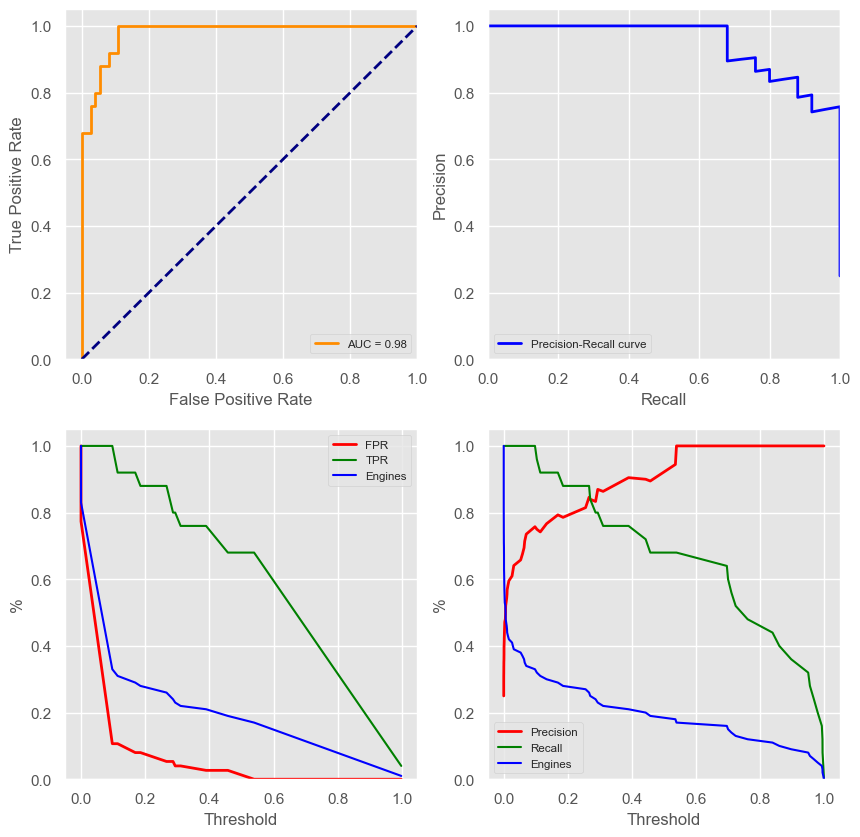

In [123]:
model = 'Random Forest B'
clf_rfcb = RandomForestClassifier(n_estimators=50, random_state=123)
gs_params = {'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_rfcb, pred_rfcb = bin_classify(model, clf_rfcb, features_orig, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_rfcb)

metrics_rfcb, roc_rfcb, prc_rfcb = bin_class_metrics(model, y_test, pred_rfcb.y_pred, pred_rfcb.y_score, print_out=True, plot_out=True)


Best Parameters:
 RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=50,
                       random_state=123)
-----------------------------------------------------------
Random Forest A 

Confusion Matrix:
[[74  1]
 [ 8 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        75
           1       0.94      0.68      0.79        25

    accuracy                           0.91       100
   macro avg       0.92      0.83      0.87       100
weighted avg       0.91      0.91      0.90       100


Metrics:
           Random Forest A
Accuracy          0.910000
Precision         0.944444
Recall            0.680000
F1 Score          0.790698
ROC AUC           0.982400

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0         inf   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1    0.999685   1  24  75   0  0.04  0.000000  1.000000  0.757576 

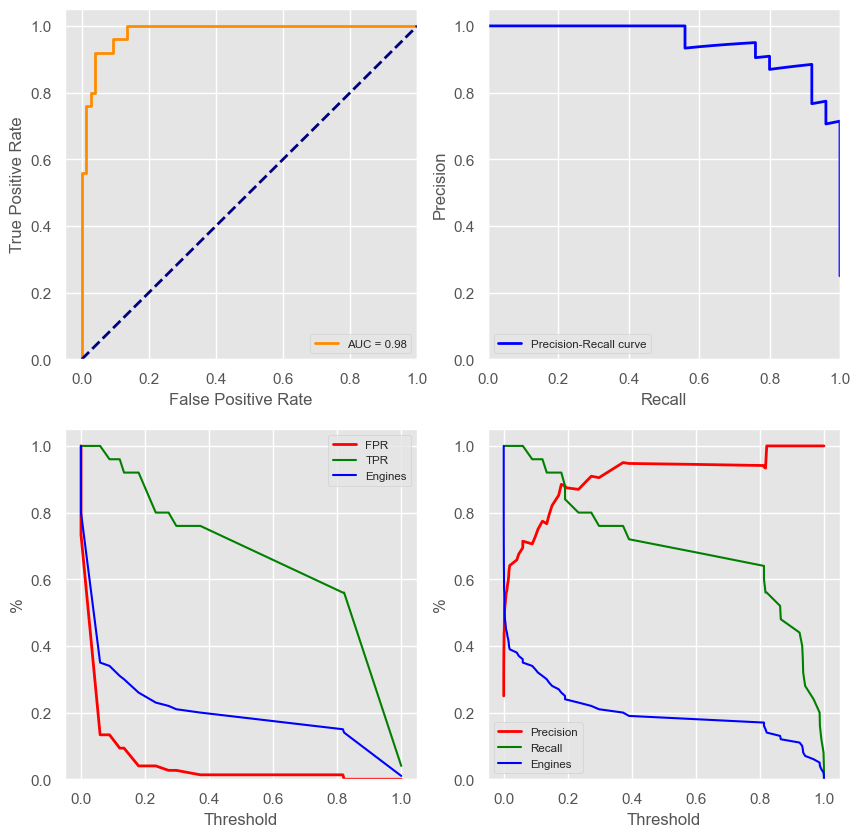

In [124]:
model = 'Random Forest A'
clf_rfca = RandomForestClassifier(n_estimators=50, random_state=123)
gs_params = {'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_rfca, pred_rfca = bin_classify(model, clf_rfca, features_extr, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_rfca)

metrics_rfca, roc_rfca, prc_rfca = bin_class_metrics(model, y_test, pred_rfca.y_pred, pred_rfca.y_score, print_out=True, plot_out=True)

In [125]:
metrics_rfc = pd.concat([metrics_rfcb, metrics_rfca], axis=1)
metrics_rfc

,Random Forest B,Random Forest A
Accuracy,0.910000,0.910000
Precision,0.944444,0.944444
Recall,0.680000,0.680000
F1 Score,0.790698,0.790698
ROC AUC,0.980267,0.982400



Best Parameters:
 SVC(random_state=123)
-----------------------------------------------------------
SVC B 

Confusion Matrix:
[[75  0]
 [25  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        75
           1       0.00      0.00      0.00        25

    accuracy                           0.75       100
   macro avg       0.38      0.50      0.43       100
weighted avg       0.56      0.75      0.64       100


Metrics:
            SVC B
Accuracy   0.7500
Precision  0.0000
Recall     0.0000
F1 Score   0.0000
ROC AUC    0.8096

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0         inf   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1   -0.949422   1  24  75   0  0.04  0.000000  1.000000  0.757576  0.01
2   -0.983131   9  16  75   0  0.36  0.000000  1.000000  0.824176  0.09
3   -0.985559   9  16  73   2  0.36  0.026667  0.973333  0.820225  0.11
4   -0.

C:\Users\anush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.p

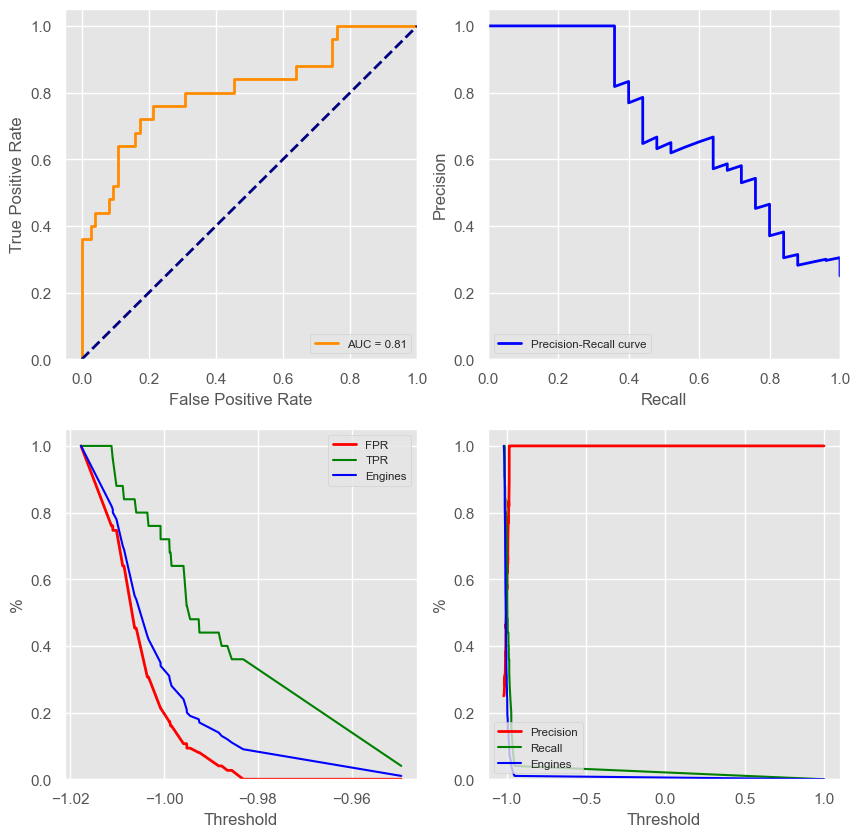

In [126]:
model = 'SVC B'
clf_svcb = SVC(kernel='rbf', random_state=123)
gs_params = {'C': [1.0]}
gs_score = 'roc_auc'

clf_svcb, pred_svcb = bin_classify(model, clf_svcb, features_orig, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_svcb)

metrics_svcb, roc_svcb, prc_svcb = bin_class_metrics(model, y_test, pred_svcb.y_pred, pred_svcb.y_score, print_out=True, plot_out=True)


Best Parameters:
 SVC(random_state=123)
-----------------------------------------------------------
SVC A 

Confusion Matrix:
[[75  0]
 [25  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        75
           1       0.00      0.00      0.00        25

    accuracy                           0.75       100
   macro avg       0.38      0.50      0.43       100
weighted avg       0.56      0.75      0.64       100


Metrics:
            SVC A
Accuracy   0.7500
Precision  0.0000
Recall     0.0000
F1 Score   0.0000
ROC AUC    0.8272

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0         inf   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1   -0.956142   1  24  75   0  0.04  0.000000  1.000000  0.757576  0.01
2   -0.984095   9  16  75   0  0.36  0.000000  1.000000  0.824176  0.09
3   -0.985887   9  16  73   2  0.36  0.026667  0.973333  0.820225  0.11
4   -0.

C:\Users\anush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.p

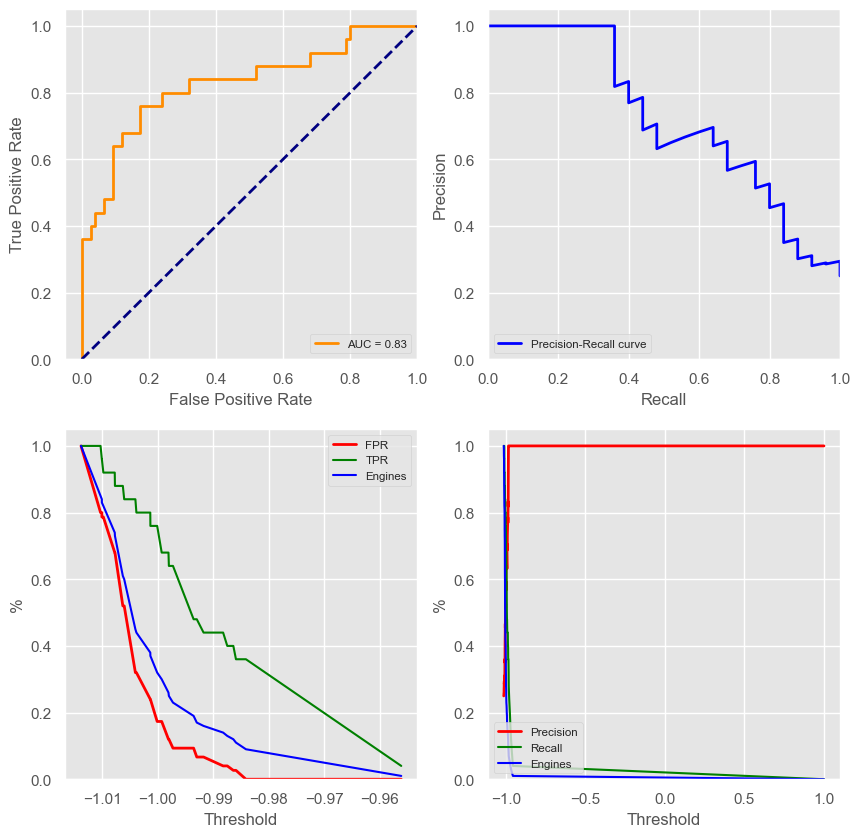

In [127]:
model = 'SVC A'
clf_svca = SVC(kernel='rbf', random_state=123)
gs_params = {'C': [1.0]}
gs_score = 'roc_auc'

clf_svca, pred_svca = bin_classify(model, clf_svca, features_extr, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_svca)

metrics_svca, roc_svca, prc_svca = bin_class_metrics(model, y_test, pred_svca.y_pred, pred_svca.y_score, print_out=True, plot_out=True)

In [128]:
# Compare SVC Before and After FE
metrics_svc = pd.concat([metrics_svcb, metrics_svca], axis=1)
metrics_svc.sort_index()

,SVC B,SVC A
Accuracy,0.7500,0.7500
F1 Score,0.0000,0.0000
Precision,0.0000,0.0000
ROC AUC,0.8096,0.8272
Recall,0.0000,0.0000


C:\Users\anush\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\anush\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Best Parameters:
 LinearSVC(random_state=123)
-----------------------------------------------------------
SVC Linear B 

Confusion Matrix:
[[75  0]
 [23  2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        75
           1       1.00      0.08      0.15        25

    accuracy                           0.77       100
   macro avg       0.88      0.54      0.51       100
weighted avg       0.82      0.77      0.69       100


Metrics:
           SVC Linear B
Accuracy       0.770000
Precision      1.000000
Recall         0.080000
F1 Score       0.148148
ROC AUC        0.971733

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0         inf   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1    0.289554   1  24  75   0  0.04  0.000000  1.000000  0.757576  0.01
2   -0.566558  11  14  75   0  0.44  0.000000  1.000000  0.842697  0.11
3   -0.588142  11  14  74   1 

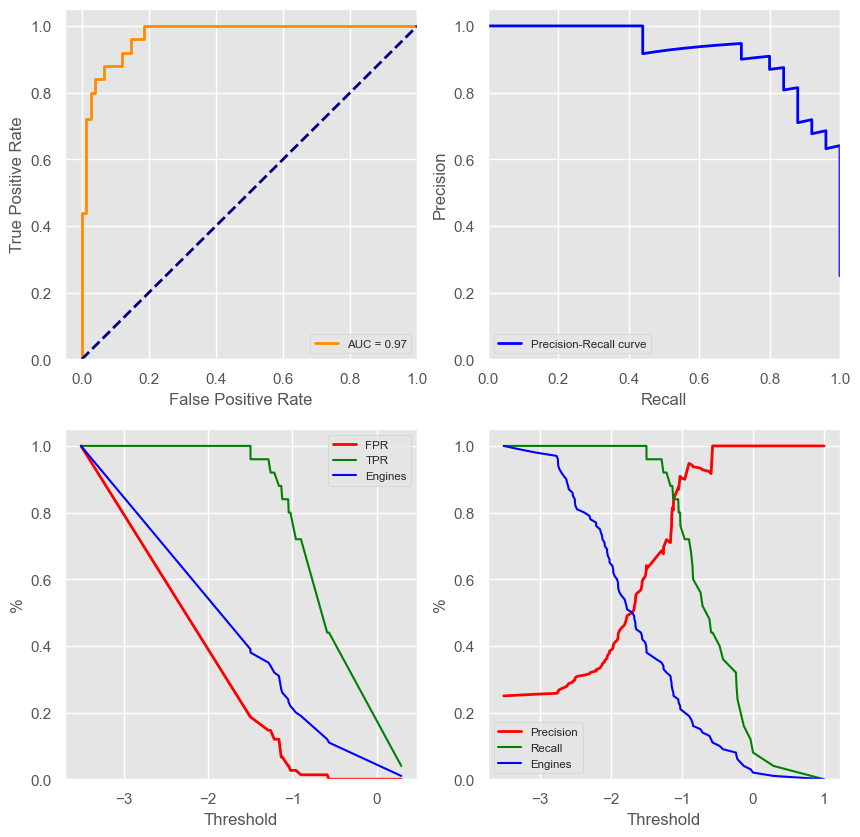

In [129]:
model = 'SVC Linear B'
clf_svlb = LinearSVC(random_state=123)
gs_params = {'C': [.01 ,.1 ,1.0]}
gs_score = 'roc_auc'

clf_svlb, pred_svlb = bin_classify(model, clf_svlb, features_orig, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_svlb)

metrics_svlb, roc_svlb, prc_svlb = bin_class_metrics(model, y_test, pred_svlb.y_pred, pred_svlb.y_score, print_out=True, plot_out=True)

C:\Users\anush\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\anush\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Best Parameters:
 LinearSVC(C=0.001, random_state=123)
-----------------------------------------------------------
SVC Linear A 

Confusion Matrix:
[[74  1]
 [ 7 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        75
           1       0.95      0.72      0.82        25

    accuracy                           0.92       100
   macro avg       0.93      0.85      0.88       100
weighted avg       0.92      0.92      0.92       100


Metrics:
           SVC Linear A
Accuracy       0.920000
Precision      0.947368
Recall         0.720000
F1 Score       0.818182
ROC AUC        0.979733

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0         inf   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1    0.950379   1  24  75   0  0.04  0.000000  1.000000  0.757576  0.01
2    0.262742  13  12  75   0  0.52  0.000000  1.000000  0.862069  0.13
3    0.204469  13  12

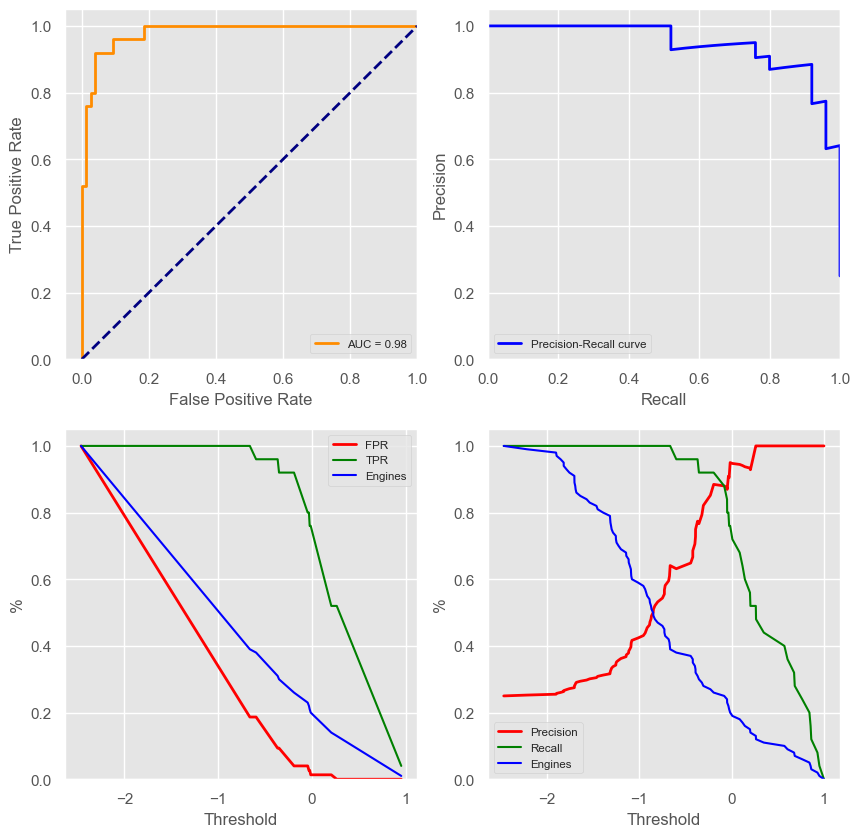

In [130]:
model = 'SVC Linear A'
clf_svla = LinearSVC(random_state=123)
gs_params = {'C': [.001, .01 ,.1 ]}
gs_score = 'roc_auc'

clf_svla, pred_svla = bin_classify(model, clf_svla, features_extr, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_svla)

metrics_svla, roc_svla, prc_svla = bin_class_metrics(model, y_test, pred_svla.y_pred, pred_svla.y_score, print_out=True, plot_out=True)


In [131]:
# Compare Linear SVC Before and After FE
metrics_svl = pd.concat([metrics_svlb, metrics_svla], axis=1)
metrics_svl.sort_index()

,SVC Linear B,SVC Linear A
Accuracy,0.770000,0.920000
F1 Score,0.148148,0.818182
Precision,1.000000,0.947368
ROC AUC,0.971733,0.979733
Recall,0.080000,0.720000


In [132]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

def knn_classification(X_train, X_test, y_train, y_test, n_neighbors=5):
    # Create KNN classifier
    clf = KNeighborsClassifier(n_neighbors=n_neighbors, n_jobs=-1)

    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the model
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    return clf, y_pred


Best Parameters:
 GaussianNB()
-----------------------------------------------------------
Gaussian NB B 

Confusion Matrix:
[[70  5]
 [ 1 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        75
           1       0.83      0.96      0.89        25

    accuracy                           0.94       100
   macro avg       0.91      0.95      0.92       100
weighted avg       0.95      0.94      0.94       100


Metrics:
           Gaussian NB B
Accuracy        0.940000
Precision       0.827586
Recall          0.960000
F1 Score        0.888889
ROC AUC         0.987733

ROC Thresholds:

       Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0            inf   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1   1.000000e+00   8  17  75   0  0.32  0.000000  1.000000  0.815217  0.08
2   1.000000e+00  17   8  75   0  0.68  0.000000  1.000000  0.903614  0.17
3   1.000000e+00  17   8  

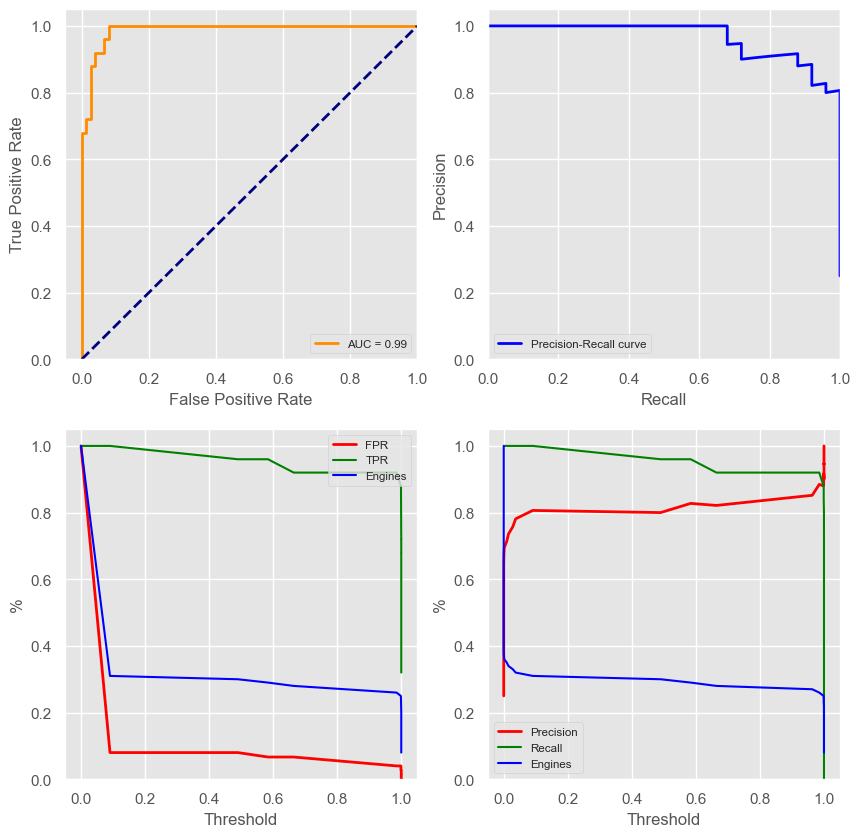

In [134]:
model = 'Gaussian NB B'
clf_gnbb = GaussianNB()
gs_params = {} 
gs_score = 'roc_auc'

clf_gnbb, pred_gnbb = bin_classify(model, clf_gnbb, features_orig, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_gnbb)

metrics_gnbb, roc_gnbb, prc_gnbb = bin_class_metrics(model, y_test, pred_gnbb.y_pred, pred_gnbb.y_score, print_out=True, plot_out=True)


Best Parameters:
 GaussianNB()
-----------------------------------------------------------
Gaussian NB A 

Confusion Matrix:
[[70  5]
 [ 1 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        75
           1       0.83      0.96      0.89        25

    accuracy                           0.94       100
   macro avg       0.91      0.95      0.92       100
weighted avg       0.95      0.94      0.94       100


Metrics:
           Gaussian NB A
Accuracy        0.940000
Precision       0.827586
Recall          0.960000
F1 Score        0.888889
ROC AUC         0.980533

ROC Thresholds:

       Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0            inf   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1   1.000000e+00  17   8  74   1  0.68  0.013333  0.986667  0.902439  0.18
2   1.000000e+00  20   5  74   1  0.80  0.013333  0.986667  0.936709  0.21
3   9.999630e-01  20   5  

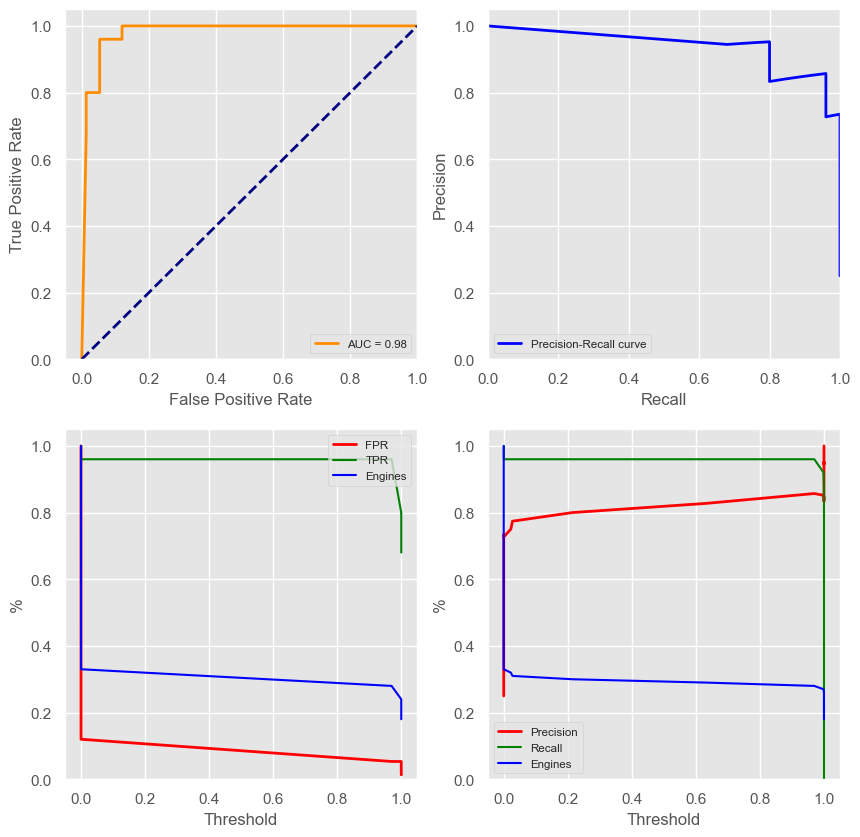

In [135]:
model = 'Gaussian NB A'
clf_gnba = GaussianNB()
gs_params = {} 
gs_score = 'roc_auc'

clf_gnba, pred_gnba = bin_classify(model, clf_gnba, features_extr, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_gnba)

metrics_gnba, roc_gnba, prc_gnba = bin_class_metrics(model, y_test, pred_gnba.y_pred, pred_gnba.y_score, print_out=True, plot_out=True)

In [136]:
# Compare Naive Bayes Before and After FE
metrics_gnb = pd.concat([metrics_gnbb, metrics_gnba], axis=1)
metrics_gnb.sort_index()

,Gaussian NB B,Gaussian NB A
Accuracy,0.940000,0.940000
F1 Score,0.888889,0.888889
Precision,0.827586,0.827586
ROC AUC,0.987733,0.980533
Recall,0.960000,0.960000


Binary Classification Summary:

Most of the binary classifiers showed better performance metrics with the addition of new features.
Random Forest and Naive Bayes showed same performance before and after feature engineering.
Naive Bayes and Linear SVC (with new features) scored better than other classifiers in Recall (Sensitivity) while others scored better in Precision.
Linear SVC has totally different scoring metrics before and after FE, switching between Precision and Recall !!
Although SVC (rbf) has the lowest AUC-ROC, it has the best precision-recall curve operating at threshold 0.17, giving %100 precision and %68 recall, targeting %17 of the engines
The graphs for TPR, FPR, and Engines should be linked to cost matrix of (TP, FP, TN, FN) to calculate the expected value at different operating points (thresholds) to help optimizing business decisions.

Expected Value Calculation:
Based on the book: Data Science for Business, Expected Value is a method to compare different classification models by constructing cost-benefit matrix in line with the confusion matrix, and then convert model performance to a single monetary value by multiplying confusion matrix into the cost-benefit matrix.

_Expected Profit = Prop(+ve) x [TPR x benefit(TP) + FNR x cost(FN)] + Prob(-ve) x [TNR x benefit(TN) + FPR x cost(FP)] _
Cost-benefit matrix should be designed by domain expert. Let us assume the following:

True Positive (TP) has benefit of USD 300K: engines that need maintenance and correctly selected by the model.
True Negative (TN) has benefit of USD 0K: engines that are OK and not selected by the model.
False Positive (FP) has cost of USD -100K: engines that are OK but selected by the model.
False Negative (FN) has cost of USD -200K: engines that need maintenance but not selected by the model.
No. of positive class instances in the test data = 25
No. of negative class instances in the test data = 75

For constrained operations:

Working at capacity of %26: Best proft per engine is USD 17.35 (Random Forest A or SVC Linear A)
Working at capacity of %28: Best profit per engine is USD 18.69 (Logistic Regression B or Gaussian NB A)

Summary:

With the use of Expected Value method to calculate business gain in monetary units, we were able to compare different classification models and support decision-making in different operating conditions.

Regression Modelling:
Segment training and test data into features dataframe and labels series.

To make it easy to train models on different set of features, a variable to hold the set of features required was used to subset the original dataframes

In [145]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn import model_selection #import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn import metrics  # mean_squared_error, mean_absolute_error, median_absolute_error, explained_variance_score, r2_score
from sklearn.feature_selection import SelectFromModel, RFECV

In [146]:
#Prepare data for regression model

# original features
features_orig = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

# original + extracted fetures
features_adxf = ['setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 'av1', 'av2', 'av3', 'av4', 'av5', 'av6', 'av7', 'av8', 'av9', 'av10', 'av11', 'av12', 'av13', 'av14', 'av15', 'av16', 'av17', 'av18', 'av19', 'av20', 'av21', 'sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6', 'sd7', 'sd8', 'sd9', 'sd10', 'sd11', 'sd12', 'sd13', 'sd14', 'sd15', 'sd16', 'sd17', 'sd18', 'sd19', 'sd20', 'sd21']

# features with low or no correlation with regression label
features_lowcr = ['setting3', 's1', 's10', 's18','s19','s16','s5', 'setting1', 'setting2']

# features that have correlation with regression label
features_corrl = ['s2', 's3', 's4', 's6', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20','s21']

# a variable to hold the set of features to experiment with
features = features_orig


X_train = df_train[features]
y_train = df_train['ttf']

X_test = df_test[features]
y_test = df_test['ttf']

In [147]:
def get_regression_metrics(model, actual, predicted):
    
    """Calculate main regression metrics.
    
    Args:
        model (str): The model name identifier
        actual (series): Contains the test label values
        predicted (series): Contains the predicted values
        
    Returns:
        dataframe: The combined metrics in single dataframe
    
    
    """
    regr_metrics = {
                        'Root Mean Squared Error' : metrics.mean_squared_error(actual, predicted)**0.5,
                        'Mean Absolute Error' : metrics.mean_absolute_error(actual, predicted),
                        'R^2' : metrics.r2_score(actual, predicted),
                        'Explained Variance' : metrics.explained_variance_score(actual, predicted)
                   }

    #return reg_metrics
    df_regr_metrics = pd.DataFrame.from_dict(regr_metrics, orient='index')
    df_regr_metrics.columns = [model]
    return df_regr_metrics

In [148]:
def plot_features_weights(model, weights, feature_names, weights_type='c'):
    
    """Plot regression coefficients weights or feature importance.
    
    Args:
        model (str): The model name identifier
        weights (array): Contains the regression coefficients weights or feature importance
        feature_names (list): Contains the corresponding features names
        weights_type (str): 'c' for 'coefficients weights', otherwise is 'feature importance'
        
    Returns:
        plot of either regression coefficients weights or feature importance
        
    
    """
    (px, py) = (8, 10) if len(weights) > 30 else (8, 5)
    W = pd.DataFrame({'Weights':weights}, feature_names)
    W.sort_values(by='Weights', ascending=True).plot(kind='barh', color='r', figsize=(px,py))
    label = ' Coefficients' if weights_type =='c' else ' Features Importance'
    plt.xlabel(model + label)
    plt.gca().legend_ = None

In [149]:
def plot_residual(model, y_train, y_train_pred, y_test, y_test_pred):
    
    """Print the regression residuals.
    
    Args:
        model (str): The model name identifier
        y_train (series): The training labels
        y_train_pred (series): Predictions on training data
        y_test (series): The test labels
        y_test_pred (series): Predictions on test data
        
    Returns:
        Plot of regression residuals
    
    """
    
    plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-50, xmax=400, color='red', lw=2)
    plt.title(model + ' Residuals')
    plt.show()

In [151]:
#try linear regression

linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)

y_test_predict = linreg.predict(X_test)
y_train_predict = linreg.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

linreg_metrics = get_regression_metrics('Linear Regression', y_test, y_test_predict)
linreg_metrics

R^2 training: 0.580, R^2 test: 0.405


,Linear Regression
Root Mean Squared Error,32.041095
Mean Absolute Error,25.591780
R^2,0.405495
Explained Variance,0.665297


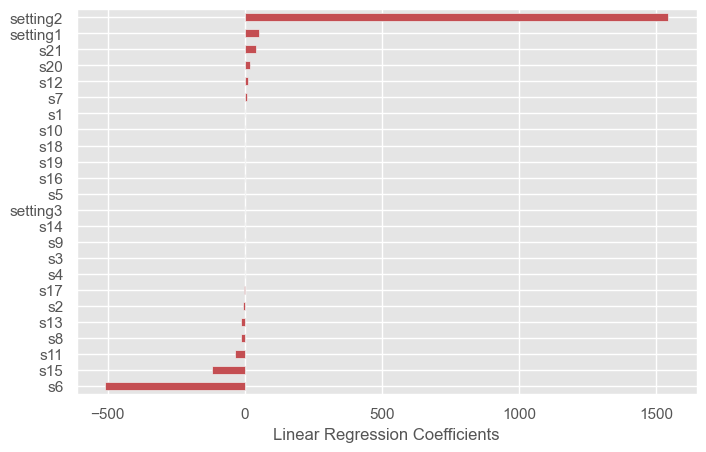

In [152]:
plot_features_weights('Linear Regression', linreg.coef_, X_train.columns, 'c')

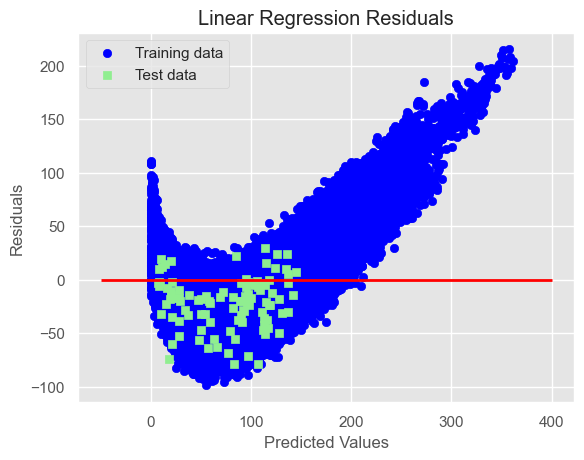

In [153]:
plot_residual('Linear Regression', y_train_predict, y_train, y_test_predict, y_test)


In [154]:
#try LASSO

lasso = linear_model.Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

y_test_predict = lasso.predict(X_test)
y_train_predict = lasso.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

lasso_metrics = get_regression_metrics('LASSO', y_test, y_test_predict)

lasso_metrics

R^2 training: 0.579, R^2 test: 0.408


,LASSO
Root Mean Squared Error,31.966099
Mean Absolute Error,25.551808
R^2,0.408275
Explained Variance,0.668206


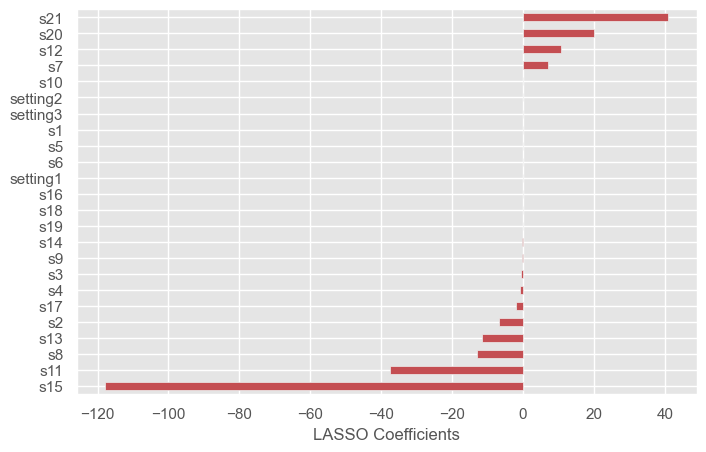

In [155]:
plot_features_weights('LASSO', lasso.coef_, X_train.columns, 'c')


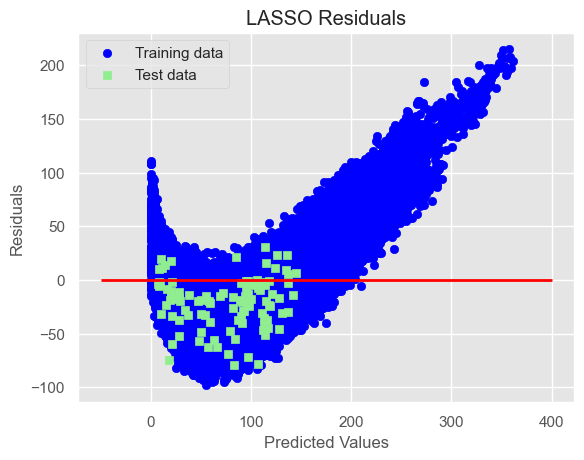

In [156]:
plot_residual('LASSO', y_train_predict, y_train, y_test_predict, y_test)


In [157]:
#try ridge

rdg = linear_model.Ridge(alpha=0.01)
rdg.fit(X_train, y_train)

y_test_predict = rdg.predict(X_test)
y_train_predict = rdg.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

rdg_metrics = get_regression_metrics('Ridge Regression', y_test, y_test_predict)
rdg_metrics

R^2 training: 0.580, R^2 test: 0.408


,Ridge Regression
Root Mean Squared Error,31.965740
Mean Absolute Error,25.544620
R^2,0.408289
Explained Variance,0.667607


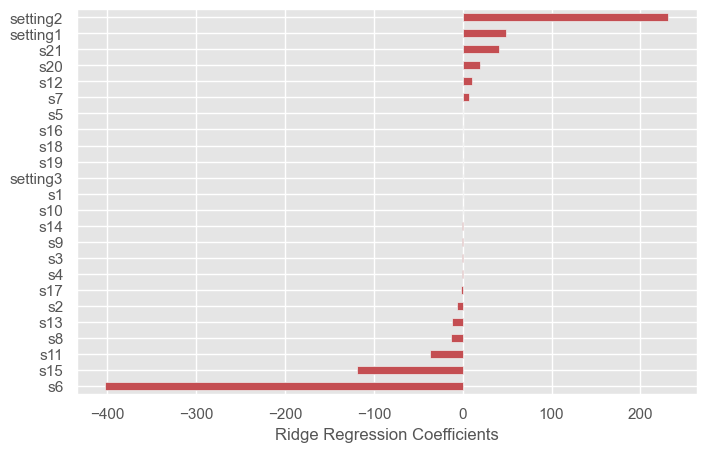

In [158]:
plot_features_weights('Ridge Regression', rdg.coef_, X_train.columns, 'c')


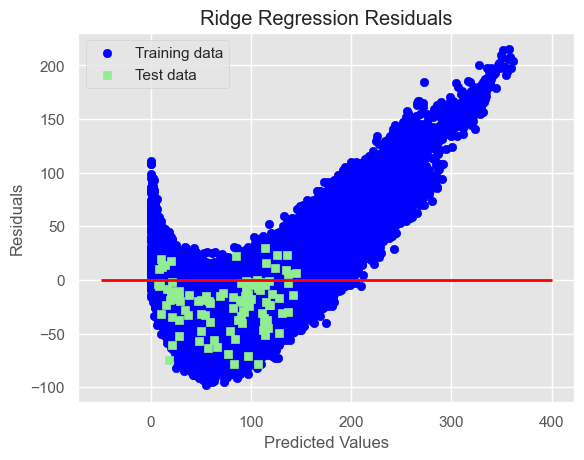

In [159]:
plot_residual('Ridge Regression', y_train_predict, y_train, y_test_predict, y_test)


In [160]:
#try Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)


polyreg = linear_model.LinearRegression()
polyreg.fit(X_train_poly, y_train)

y_test_predict = polyreg.predict(X_test_poly)
y_train_predict = polyreg.predict(X_train_poly)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

polyreg_metrics = get_regression_metrics('Polynomial Regression', y_test, y_test_predict)
polyreg_metrics

R^2 training: 0.627, R^2 test: 0.433


,Polynomial Regression
Root Mean Squared Error,31.284464
Mean Absolute Error,23.819219
R^2,0.433242
Explained Variance,0.642999


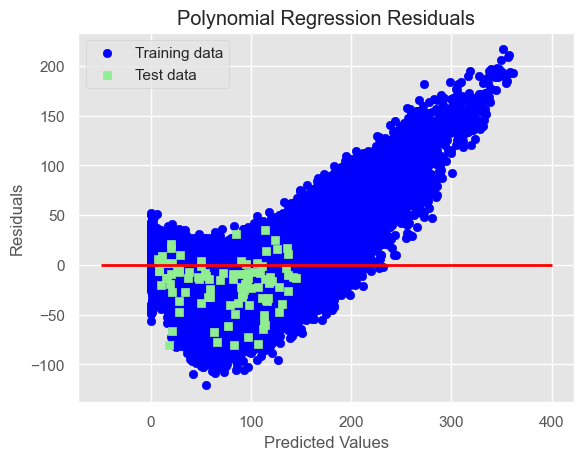

In [161]:
plot_residual('Polynomial Regression', y_train_predict, y_train, y_test_predict, y_test)


In [162]:
#try Decision Tree regressor

#dtrg = DecisionTreeRegressor(max_depth=8, max_features=5, random_state=123) # selected features
dtrg = DecisionTreeRegressor(max_depth=7, random_state=123)
dtrg.fit(X_train, y_train)

y_test_predict = dtrg.predict(X_test)
y_train_predict = dtrg.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

dtrg_metrics = get_regression_metrics('Decision Tree Regression', y_test, y_test_predict)
dtrg_metrics

R^2 training: 0.625, R^2 test: 0.403


,Decision Tree Regression
Root Mean Squared Error,32.095349
Mean Absolute Error,24.319068
R^2,0.403480
Explained Variance,0.632767


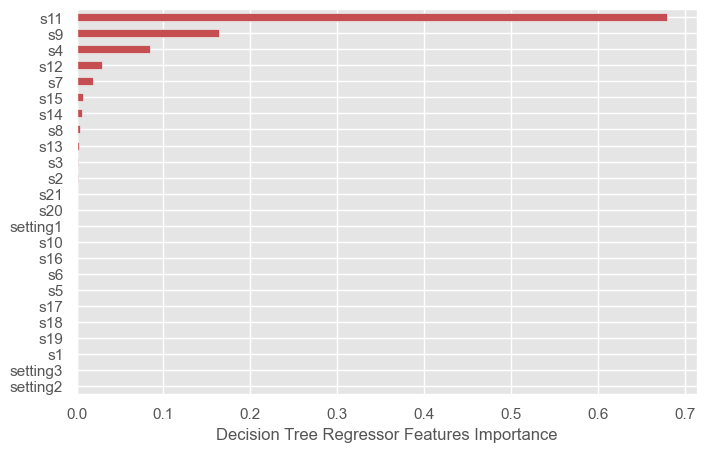

In [163]:
plot_features_weights('Decision Tree Regressor', dtrg.feature_importances_, X_train.columns, 't' )


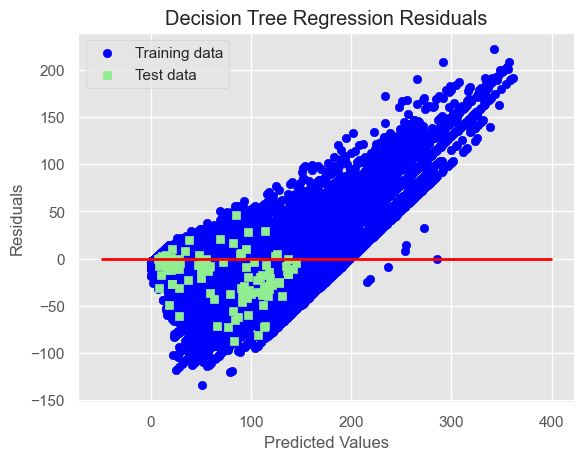

In [164]:
plot_residual('Decision Tree Regression', y_train_predict, y_train, y_test_predict, y_test)


In [171]:
# Decition Tree with selected features

#trnsform train and test data
X_train_trn = rfecv.transform(X_train)
X_test_trn = rfecv.transform(X_test)

print(X_train.shape)

dtrg = DecisionTreeRegressor(max_depth=7)

dtrg.fit(X_train_trn, y_train)

y_test_predict = dtrg.predict(X_test_trn)

dtrg_fs_metrics = get_regression_metrics('Decision Tree: Selected Features', y_test, y_test_predict)

#combine decision tree results: All features and selected features
dtr_metrics = pd.concat([dtrg_fs_metrics,dtrg_metrics], axis=1)

dtr_metrics

(20631, 24)


,Decision Tree: Selected Features,Decision Tree Regression
Root Mean Squared Error,34.212392,32.095349
Mean Absolute Error,25.866117,24.319068
R^2,0.322191,0.403480
Explained Variance,0.593892,0.632767


Model performance using only 5 top important features is comparable to using all 24 features.

What is % importance of these 5 features?

In [172]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(sel_features, dtrg.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})

importances.sort_values(by='Importance', ascending=False)

,Importance
s11,0.682967
s9,0.168857
s4,0.091236
s12,0.033993
s7,0.022947


In [173]:
#try Random Forest

#rf = RandomForestRegressor(n_estimators=100, max_features=2, max_depth=4, n_jobs=-1, random_state=1) # selected features
rf = RandomForestRegressor(n_estimators=100, max_features=3, max_depth=4, n_jobs=-1, random_state=1) # original features
#rf = RandomForestRegressor(n_estimators=100, max_features=3, max_depth=7, n_jobs=-1, random_state=1) # orig + extrcted 

rf.fit(X_train, y_train)

y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

rf_metrics = get_regression_metrics('Random Forest Regression', y_test, y_test_predict)
rf_metrics

R^2 training: 0.594, R^2 test: 0.525


,Random Forest Regression
Root Mean Squared Error,28.634253
Mean Absolute Error,23.167130
R^2,0.525198
Explained Variance,0.767320


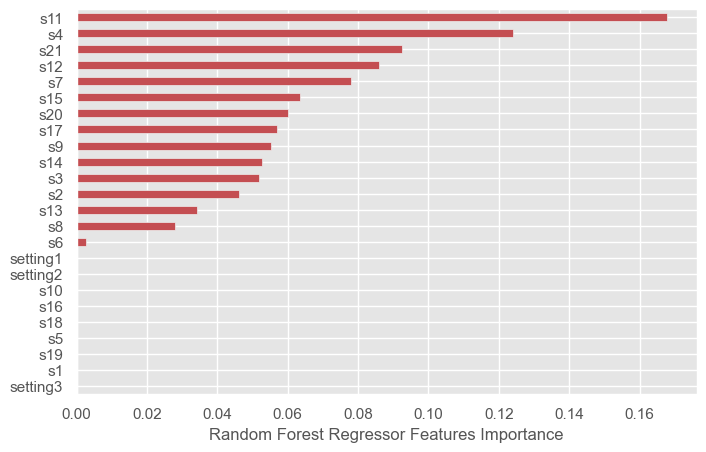

In [174]:
plot_features_weights('Random Forest Regressor', rf.feature_importances_, X_train.columns, 't' )


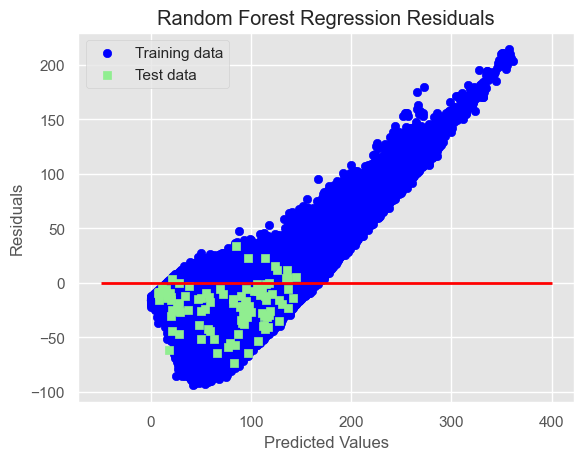

In [175]:
plot_residual('Random Forest Regression', y_train_predict, y_train, y_test_predict, y_test)


regression residuals were not randomly spread across the average value of the residuals. This could be improved by fixing the data (e.g. outliers, resampling) or model parameters tuning.

In [176]:
# view predictions vs actual

rf_pred_dict = {
                'Actual' : y_test,
                'Prediction' : y_test_predict
            }
    
rf_pred = pd.DataFrame.from_dict(rf_pred_dict).T
rf_pred

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Actual,112.000000,98.000000,69.000000,82.000000,91.00000,93.000000,91.000000,95.000000,111.00000,96.000000,...,38.000000,20.000000,85.00000,55.000000,128.000000,137.000000,82.000000,59.000000,117.000000,20.00000
Prediction,151.578408,119.268513,74.415647,96.470907,112.59338,130.279445,128.114019,100.692144,116.11839,127.369752,...,40.976045,33.031218,51.39622,64.318328,143.657061,159.663783,100.027659,103.182456,157.063688,35.62655


Compare all regression models tested:

In [177]:
#regression metrics comparison before feature engineering

reg_metrics_bfe = pd.concat([linreg_metrics, lasso_metrics, rdg_metrics, dtrg_metrics, polyreg_metrics, rf_metrics], axis=1)
reg_metrics_bfe

,Linear Regression,LASSO,Ridge Regression,Decision Tree Regression,Polynomial Regression,Random Forest Regression
Root Mean Squared Error,32.041095,31.966099,31.965740,32.095349,31.284464,28.634253
Mean Absolute Error,25.591780,25.551808,25.544620,24.319068,23.819219,23.167130
R^2,0.405495,0.408275,0.408289,0.403480,0.433242,0.525198
Explained Variance,0.665297,0.668206,0.667607,0.632767,0.642999,0.767320


Regression Summary:

In accordance with our analysis in the data exploratory phase, non-linear regression models like Polynomial and Random Forest performed better than linear models like OLS, LASSO and Ridge regression. Random Forest clearly outperformed other models scoring RMSE of 28.63 cycles, i.e. the model predicts TTF within average error range of ±28.63 cycles.

The hyper-parameter tuning for the Random Forest Regressor, LASSO, and Ridge models was done manually, but Grid Search or Random Search with Cross Validation could be used for better processing.